In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [133]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from lightgbm import LGBMRegressor
import pickle
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [134]:
# Loading/Reading the data into memory

# Fields_Summary
Fields_Summary = pd.read_excel('cars_data.xlsx', sheet_name = 1)

# Cars Data
data = pd.read_excel('cars_data.xlsx', sheet_name = 0)
data.head(5)

appointmentId  inspectionStartTime  year  month  \
0         aj_01  2019-03-02 15:43:00  2008      8   
1         aj_02        1/16/19 13:02  2007      5   
2         aj_03  2019-09-02 13:31:00  2012      5   
3         aj_04        1/18/19 11:02  2013      1   
4         aj_05        1/27/19 12:12  2011      7   

  engineTransmission_battery_value engineTransmission_battery_cc_value_0  \
0                               No                                  Weak   
1                              Yes                                   NaN   
2                              Yes                                   NaN   
3                              Yes                                   NaN   
4                              Yes                                   NaN   

  engineTransmission_battery_cc_value_1 engineTransmission_battery_cc_value_2  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  engineTransmission_battery_cc_value_3 engineTransmission_battery_cc_value_4  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

   ... engineTransmission_gearShifting_cc_value_1  \
0  ...                                        NaN   
1  ...                                        NaN   
2  ...                                        NaN   
3  ...                                        NaN   
4  ...                                        NaN   

  engineTransmission_gearShifting_cc_value_2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  engineTransmission_comments_value_0  \
0                          Pickup Low   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

       engineTransmission_comments_value_1  \
0  Starter Motor / Solenoid malfunctioning   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  engineTransmission_comments_value_2 engineTransmission_comments_value_3  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

  engineTransmission_comments_value_4     fuel_type odometer_reading  \
0                                 NaN  Petrol + CNG           124600   
1                                 NaN  Petrol + CNG            78108   
2                                 NaN        Diesel            93348   
3                                 NaN  Petrol + CNG            48233   
4                                 NaN  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5 rows x 73 columns]

In [135]:
data.shape
# rows: 26307
# columns: 73 

(26307, 73)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

- In above we see that type of inspectionStartTime column is object and it is date type column so we need to change its data type to date and time

In [137]:
# converting the data type of inspectionStartTime column from date type to date and time
data['inspectionStartTime']= pd.to_datetime(data['inspectionStartTime'])

In [138]:
data.describe()

inspectionStartTime          year         month  \
count                          26307  26307.000000  26307.000000   
mean   2019-04-19 21:31:30.580453632   2010.856578      5.462006   
min              2019-01-02 10:05:00   1989.000000      1.000000   
25%              2019-02-14 15:54:00   2008.000000      2.000000   
50%              2019-03-19 10:21:00   2011.000000      5.000000   
75%              2019-06-03 14:26:30   2014.000000      9.000000   
max              2019-12-04 19:30:00   2019.000000     12.000000   
std                              NaN      3.766234      3.583866   

       engineTransmission_engineOil_cc_value_9  \
count                                      0.0   
mean                                       NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   
std                                        NaN   

       engineTransmission_engine_cc_value_10  odometer_reading  \
count                                    0.0      26307.000000   
mean                                     NaN      76460.143764   
min                                      NaN          1.000000   
25%                                      NaN      46396.000000   
50%                                      NaN      72013.000000   
75%                                      NaN      98289.500000   
max                                      NaN     999999.000000   
std                                      NaN      46762.524489   

       rating_engineTransmission  
count               26307.000000  
mean                    3.624663  
min                     0.500000  
25%                     3.500000  
50%                     4.000000  
75%                     4.000000  
max                     5.000000  
std                     0.847645

In [139]:
# Null values in DB 
print("Null values:\n", data.isnull().sum())

Null values:
 appointmentId                                                    0
inspectionStartTime                                              0
year                                                             0
month                                                            0
engineTransmission_battery_value                                 0
engineTransmission_battery_cc_value_0                        22869
engineTransmission_battery_cc_value_1                        25877
engineTransmission_battery_cc_value_2                        26235
engineTransmission_battery_cc_value_3                        26291
engineTransmission_battery_cc_value_4                        26303
engineTransmission_engineoilLevelDipstick_value                  0
engineTransmission_engineOilLevelDipstick_cc_value_0         25896
engineTransmission_engineOil                                     0
engineTransmission_engineOil_cc_value_0                       7750
engineTransmission_engineOil_cc_value_1         

In [140]:
# Null values in DB percentage 
pd.set_option('display.max_rows', 73)
(data.isnull().sum() * 100 / data.shape[0]) #.sort_values(ascending=False)

appointmentId                                                  0.000000
inspectionStartTime                                            0.000000
year                                                           0.000000
month                                                          0.000000
engineTransmission_battery_value                               0.000000
engineTransmission_battery_cc_value_0                         86.931235
engineTransmission_battery_cc_value_1                         98.365454
engineTransmission_battery_cc_value_2                         99.726309
engineTransmission_battery_cc_value_3                         99.939180
engineTransmission_battery_cc_value_4                         99.984795
engineTransmission_engineoilLevelDipstick_value                0.000000
engineTransmission_engineOilLevelDipstick_cc_value_0          98.437678
engineTransmission_engineOil                                   0.000000
engineTransmission_engineOil_cc_value_0                       29

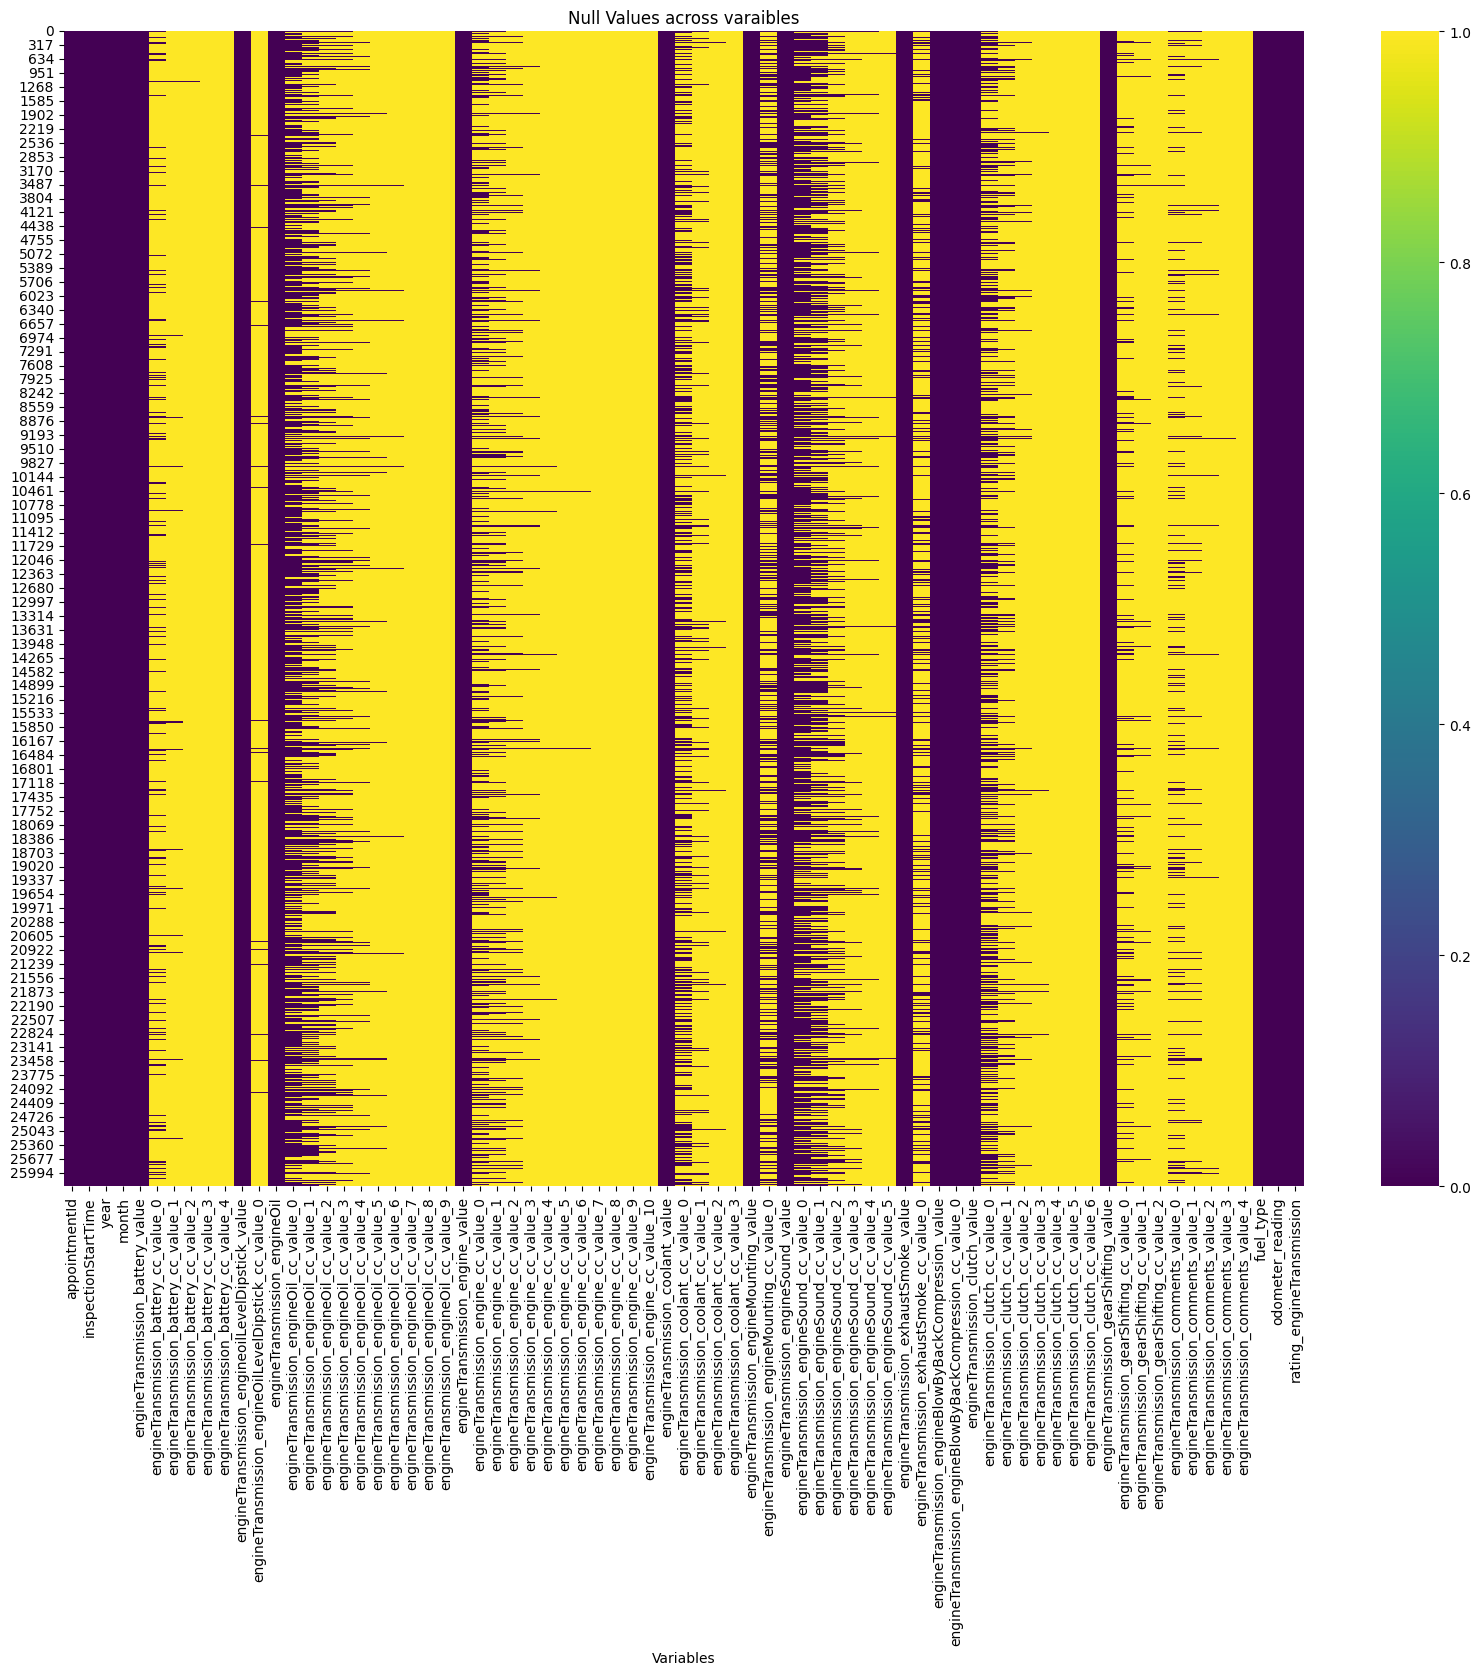

In [141]:
#  Plotting the null values heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.xlabel("Variables")
plt.title("Null Values across varaibles")
plt.show()

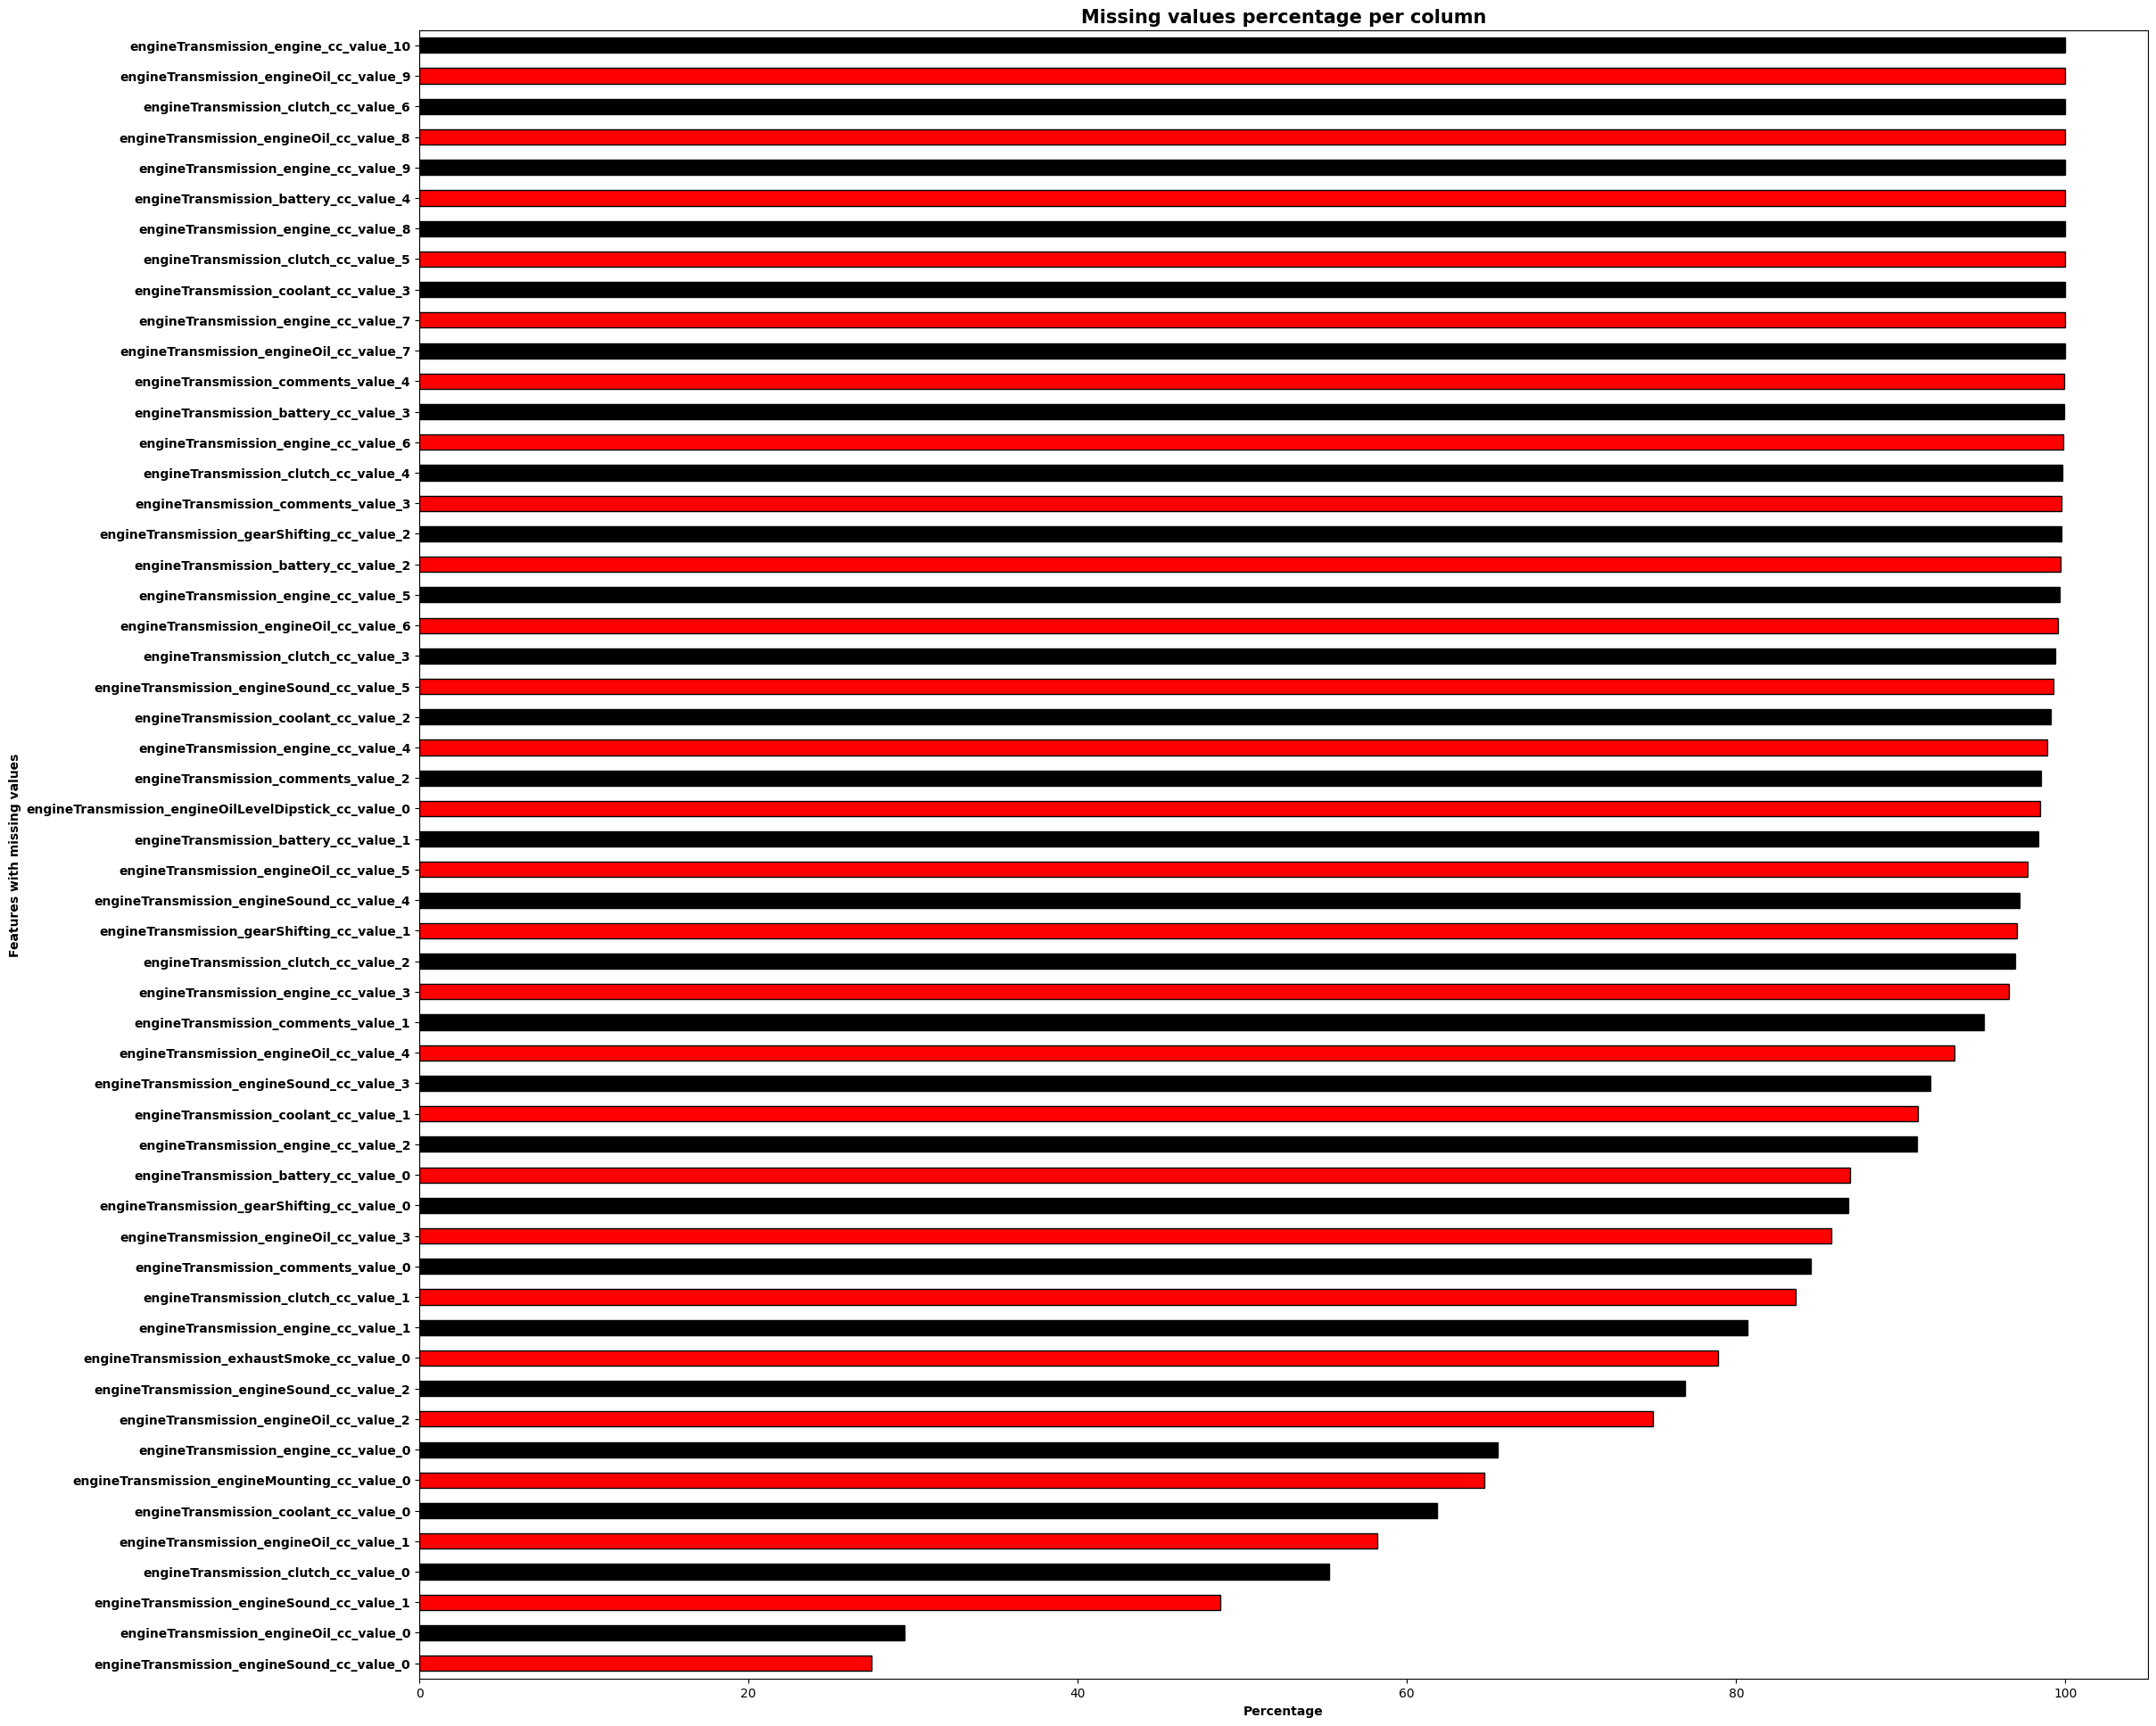

In [142]:
# Plotting NaN values percentage per each feature column

allna = (data.isnull().sum() / len(data))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(25, 24))
allna.plot.barh(color=('red', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=10)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [143]:
#Extracting the variables having more than 40% null values

null_values  = data.columns[data.isnull().sum() * 100 / data.shape[0] > 40]
len (null_values)
#print("Total number of columns which has more than 40% null values in it: {}".format(len(null_values)))

52

- 52 out of 72 independent varaibles have more then 40% null values.

In [144]:
Fields_Summary = pd.read_excel('cars_data.xlsx', sheet_name = 1)
Fields_Summary

Columns  \
0                                       appointmentId   
1                                 inspectionStartTime   
2                                                year   
3                                               month   
4                    engineTransmission_battery_value   
5               engineTransmission_battery_cc_value_0   
6               engineTransmission_battery_cc_value_1   
7               engineTransmission_battery_cc_value_2   
8               engineTransmission_battery_cc_value_3   
9               engineTransmission_battery_cc_value_4   
10    engineTransmission_engineoilLevelDipstick_value   
11  engineTransmission_engineOilLevelDipstick_cc_v...   
12                       engineTransmission_engineOil   
13            engineTransmission_engineOil_cc_value_0   
14            engineTransmission_engineOil_cc_value_1   
15            engineTransmission_engineOil_cc_value_2   
16            engineTransmission_engineOil_cc_value_3   
17            engineTransmission_engineOil_cc_value_4   
18            engineTransmission_engineOil_cc_value_5   
19            engineTransmission_engineOil_cc_value_6   
20            engineTransmission_engineOil_cc_value_7   
21            engineTransmission_engineOil_cc_value_8   
22            engineTransmission_engineOil_cc_value_9   
23                    engineTransmission_engine_value   
24               engineTransmission_engine_cc_value_0   
25               engineTransmission_engine_cc_value_1   
26               engineTransmission_engine_cc_value_2   
27               engineTransmission_engine_cc_value_3   
28               engineTransmission_engine_cc_value_4   
29               engineTransmission_engine_cc_value_5   
30               engineTransmission_engine_cc_value_6   
31               engineTransmission_engine_cc_value_7   
32               engineTransmission_engine_cc_value_8   
33               engineTransmission_engine_cc_value_9   
34              engineTransmission_engine_cc_value_10   
35                   engineTransmission_coolant_value   
36              engineTransmission_coolant_cc_value_0   
37              engineTransmission_coolant_cc_value_1   
38              engineTransmission_coolant_cc_value_2   
39              engineTransmission_coolant_cc_value_3   
40            engineTransmission_engineMounting_value   
41       engineTransmission_engineMounting_cc_value_0   
42               engineTransmission_engineSound_value   
43          engineTransmission_engineSound_cc_value_0   
44          engineTransmission_engineSound_cc_value_1   
45          engineTransmission_engineSound_cc_value_2   
46          engineTransmission_engineSound_cc_value_3   
47          engineTransmission_engineSound_cc_value_4   
48          engineTransmission_engineSound_cc_value_5   
49              engineTransmission_exhaustSmoke_value   
50         engineTransmission_exhaustSmoke_cc_value_0   
51  engineTransmission_engineBlowByBackCompression...   
52  engineTransmission_engineBlowByBackCompression...   
53                    engineTransmission_clutch_value   
54               engineTransmission_clutch_cc_value_0   
55               engineTransmission_clutch_cc_value_1   
56               engineTransmission_clutch_cc_value_2   
57               engineTransmission_clutch_cc_value_3   
58               engineTransmission_clutch_cc_value_4   
59               engineTransmission_clutch_cc_value_5   
60               engineTransmission_clutch_cc_value_6   
61              engineTransmission_gearShifting_value   
62         engineTransmission_gearShifting_cc_value_0   
63         engineTransmission_gearShifting_cc_value_1   
64         engineTransmission_gearShifting_cc_value_2   
65                engineTransmission_comments_value_0   
66                engineTransmission_comments_value_1   
67                engineTransmission_comments_value_2   
68                engineTransmission_comments_value_3   
69                engineTransmission_comments_value_4   

#### Hypothesis
- From the Fields_Summary, it seems that null values have to be imputed as "yes" in most of columns.

In [145]:
# Checking the above hypothesis
set_A = set(Fields_Summary[Fields_Summary['Description'] == "current condition if not yes"]['Columns'])
set_B = set(null_values)

# Performing an intersection of both the sets
set_A.intersection(set_B)

{'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_clutch_cc_value_2',
 'engineTransmission_clutch_cc_value_3',
 'engineTransmission_clutch_cc_value_4',
 'engineTransmission_clutch_cc_value_5',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_coolant_cc_value_2',
 'engineTransmission_coolant_cc_value_3',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineT

In [146]:
len(set_A.intersection(set_B))

47

- 47 out of 52 variables have a description of "current condition if not yes"
- hence we can conclude that our hypothesis is true, out of 52 columns 47 column has yes as defult value so we fill the null value of all 47 columns as yes.

- lets check other 5 columes those has null value but condtion is other then current "condition if not yes"

In [147]:
# Check for rest of the null variables
var_null = [var for var in null_values if var not in list(set_A.intersection(set_B))]
null_V = data[var_null]
null_V

engineTransmission_comments_value_0  \
0                              Pickup Low   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
26302           Electrical wiring Damaged   
26303                                 NaN   
26304                                 NaN   
26305                                 NaN   
26306                                 NaN   

           engineTransmission_comments_value_1  \
0      Starter Motor / Solenoid malfunctioning   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
26302                                      NaN   
26303                                      NaN   
26304                                      NaN   
26305                                      NaN   
26306                                      NaN   

      engineTransmission_comments_value_2 engineTransmission_comments_value_3  \
0                                     NaN                                 NaN   
1                                     NaN                                 NaN   
2                                     NaN                                 NaN   
3                                     NaN                                 NaN   
4                                     NaN                                 NaN   
...                                   ...                                 ...   
26302                                 NaN                                 NaN   
26303                                 NaN                                 NaN   
26304                                 NaN                                 NaN   
26305                                 NaN                                 NaN   
26306                                 NaN                                 NaN   

      engineTransmission_comments_value_4  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  
...                                   ...  
26302                                 NaN  
26303                                 NaN  
26304                                 NaN  
26305                                 NaN  
26306                                 NaN  

[26307 rows x 5 columns]

In [148]:
print(" * Out of 26307 row this many of percentage of null values are there in : ")
print(null_V.isnull().sum() *100 / 26307)

 * Out of 26307 row this many of percentage of null values are there in : 
engineTransmission_comments_value_0    84.544038
engineTransmission_comments_value_1    95.027939
engineTransmission_comments_value_2    98.517505
engineTransmission_comments_value_3    99.775725
engineTransmission_comments_value_4    99.946782
dtype: float64


- As we can analyze that in above columns has more the 80% of null values and they are also not under condition of 40% more null values in it.
- we have 2 options over here 
   1. drop those colums
   3. We can impute "no" in above columns as mentioned in Fields_Summary
  

- it is better to drop those colums as they are not important as per above analysis

In [149]:
data.drop(null_V, axis=1, inplace=True)

Now we can impute yes in null values as per Fields_Summary  

In [150]:
data = data.fillna('yes')  

In [151]:
data.isnull().sum().sum()

0

- now we don't have any null values in DB

In [152]:
data.head()

appointmentId inspectionStartTime  year  month  \
0         aj_01 2019-03-02 15:43:00  2008      8   
1         aj_02 2019-01-16 13:02:00  2007      5   
2         aj_03 2019-09-02 13:31:00  2012      5   
3         aj_04 2019-01-18 11:02:00  2013      1   
4         aj_05 2019-01-27 12:12:00  2011      7   

  engineTransmission_battery_value engineTransmission_battery_cc_value_0  \
0                               No                                  Weak   
1                              Yes                                   yes   
2                              Yes                                   yes   
3                              Yes                                   yes   
4                              Yes                                   yes   

  engineTransmission_battery_cc_value_1 engineTransmission_battery_cc_value_2  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

  engineTransmission_battery_cc_value_3 engineTransmission_battery_cc_value_4  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

   ... engineTransmission_clutch_cc_value_4  \
0  ...                                  yes   
1  ...                                  yes   
2  ...                                  yes   
3  ...                                  yes   
4  ...                                  yes   

  engineTransmission_clutch_cc_value_5 engineTransmission_clutch_cc_value_6  \
0                                  yes                                  yes   
1                                  yes                                  yes   
2                                  yes                                  yes   
3                                  yes                                  yes   
4                                  yes                                  yes   

  engineTransmission_gearShifting_value  \
0                                   Yes   
1                                   Yes   
2                                   Yes   
3                                   Yes   
4                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_1  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_2     fuel_type odometer_reading  \
0                                        yes  Petrol + CNG           124600   
1                                        yes  Petrol + CNG            78108   
2                                        yes        Diesel            93348   
3                                        yes  Petrol + CNG            48233   
4                                        yes  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5 rows

In [153]:
# checking for any NaN values left
data.isnull().sum()

appointmentId                                                0
inspectionStartTime                                          0
year                                                         0
month                                                        0
engineTransmission_battery_value                             0
engineTransmission_battery_cc_value_0                        0
engineTransmission_battery_cc_value_1                        0
engineTransmission_battery_cc_value_2                        0
engineTransmission_battery_cc_value_3                        0
engineTransmission_battery_cc_value_4                        0
engineTransmission_engineoilLevelDipstick_value              0
engineTransmission_engineOilLevelDipstick_cc_value_0         0
engineTransmission_engineOil                                 0
engineTransmission_engineOil_cc_value_0                      0
engineTransmission_engineOil_cc_value_1                      0
engineTransmission_engineOil_cc_value_2                

#### Checking for categorical variables & continuous variables

In [154]:
categorical_data = data.select_dtypes(include=['object']).columns
continuous_data = [cols for cols in data.columns if cols not in categorical_data]
print("Total Categorcal data in DB : ",len(categorical_data))
print("total continuous data in DB including target variable : ",len(continuous_data))

Total Categorcal data in DB :  63
total continuous data in DB including target variable :  5


In [155]:
continuous_data

['inspectionStartTime',
 'year',
 'month',
 'odometer_reading',
 'rating_engineTransmission']

### Learnings

- here we can see that out of 68 columns 63 are categorical data type and only 5 are continuous data type 
- which means out of the remaining 68 variables, 63 are of categorical type (~92.6% of total) & 5 are continuous columns (including the target variable).

## EDA 

In [156]:
data.describe()

inspectionStartTime          year         month  \
count                          26307  26307.000000  26307.000000   
mean   2019-04-19 21:31:30.580453632   2010.856578      5.462006   
min              2019-01-02 10:05:00   1989.000000      1.000000   
25%              2019-02-14 15:54:00   2008.000000      2.000000   
50%              2019-03-19 10:21:00   2011.000000      5.000000   
75%              2019-06-03 14:26:30   2014.000000      9.000000   
max              2019-12-04 19:30:00   2019.000000     12.000000   
std                              NaN      3.766234      3.583866   

       odometer_reading  rating_engineTransmission  
count      26307.000000               26307.000000  
mean       76460.143764                   3.624663  
min            1.000000                   0.500000  
25%        46396.000000                   3.500000  
50%        72013.000000                   4.000000  
75%        98289.500000                   4.000000  
max       999999.000000                   5.000000  
std        46762.524489                   0.847645

- here we can see that:

    1. registeration year data ranges from 1989 to 2019 (max registration year = 2019 and min registration year = 1989)

    2. Odo meter reading is range from 1 to 999999   
    (An odometer is a device that is used for measuring the distance traveled by a vehicle.)
    
    3. Rating Engine Transmission ranges 0.50 to 5.0  and avg is 3.62

### 1. Univariate Analysis

In [157]:
# 1. inspectionStartTime
min_timestamp = data['inspectionStartTime'].min()
max_timestamp = data['inspectionStartTime'].max()

print(min_timestamp, max_timestamp)

2019-01-02 10:05:00 2019-12-04 19:30:00


- inspection Start Time is  2019-01-02 10:05:00 to 2019-12-04 19:30:00

- we need to separate the date time year and time from inspectionStartTime column

In [158]:
#inspection_Date = data['inspectionStartTime'].dt.date

In [159]:
# Extract the inspection month, day & hour
inspection_Date = data['inspectionStartTime'].dt.date
inspection_Month = data['inspectionStartTime'].dt.month
inspection_WeekDay = data['inspectionStartTime'].dt.dayofweek
inspection_Day = data['inspectionStartTime'].dt.day
inspection_Hour = data['inspectionStartTime'].dt.hour

# Insert into the dataframe
data.insert(2,'inspection_Date', inspection_Date)
data.insert(3,'inspection_Month', inspection_Month)
data.insert(4,'inspection_Day', inspection_Day)
data.insert(5,'inspection_WeekDay', inspection_WeekDay)
data.insert(6,'inspection_Hour', inspection_Hour)

In [160]:
data.head()

appointmentId inspectionStartTime inspection_Date  inspection_Month  \
0         aj_01 2019-03-02 15:43:00      2019-03-02                 3   
1         aj_02 2019-01-16 13:02:00      2019-01-16                 1   
2         aj_03 2019-09-02 13:31:00      2019-09-02                 9   
3         aj_04 2019-01-18 11:02:00      2019-01-18                 1   
4         aj_05 2019-01-27 12:12:00      2019-01-27                 1   

   inspection_Day  inspection_WeekDay  inspection_Hour  year  month  \
0               2                   5               15  2008      8   
1              16                   2               13  2007      5   
2               2                   0               13  2012      5   
3              18                   4               11  2013      1   
4              27                   6               12  2011      7   

  engineTransmission_battery_value  ... engineTransmission_clutch_cc_value_4  \
0                               No  ...                                  yes   
1                              Yes  ...                                  yes   
2                              Yes  ...                                  yes   
3                              Yes  ...                                  yes   
4                              Yes  ...                                  yes   

  engineTransmission_clutch_cc_value_5 engineTransmission_clutch_cc_value_6  \
0                                  yes                                  yes   
1                                  yes                                  yes   
2                                  yes                                  yes   
3                                  yes                                  yes   
4                                  yes                                  yes   

  engineTransmission_gearShifting_value  \
0                                   Yes   
1                                   Yes   
2                                   Yes   
3                                   Yes   
4                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_1  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_2     fuel_type odometer_reading  \
0                                        yes  Petrol + CNG           124600   
1                                        yes  Petrol + CNG            78108   
2                                        yes        Diesel            93348   
3                                        yes  Petrol + CNG            48233   
4                                        yes  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5 rows x 73 columns]

In [161]:
data.groupby('inspection_Date').count()['appointmentId']

inspection_Date
2019-01-02    203
2019-01-03    199
2019-01-04    227
2019-01-13    369
2019-01-14    220
             ... 
2019-11-04    266
2019-12-01    314
2019-12-02    236
2019-12-03    219
2019-12-04    240
Name: appointmentId, Length: 102, dtype: int64

In [162]:
# print(plt.style.available)

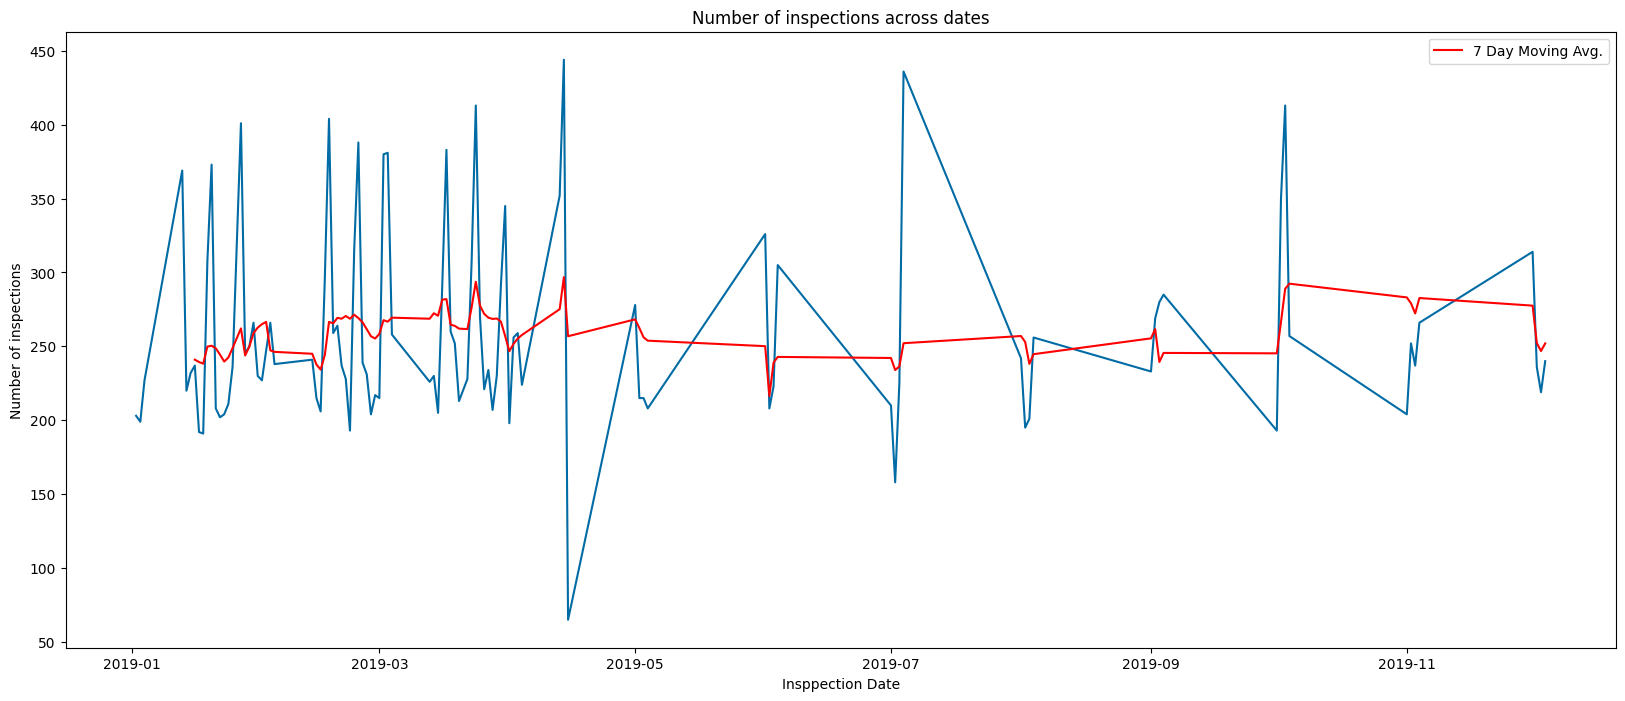

In [163]:
# 2. inspectionDate
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20, 8))
plt.plot(data.groupby('inspection_Date').count()['appointmentId'])
data.groupby('inspection_Date').count()['appointmentId'].rolling(7).mean().plot(label='7 Day Moving Avg.', color='red')
plt.xlabel("Insppection Date")
plt.ylabel("Number of inspections")
plt.title("Number of inspections across dates")
plt.legend()
plt.show()

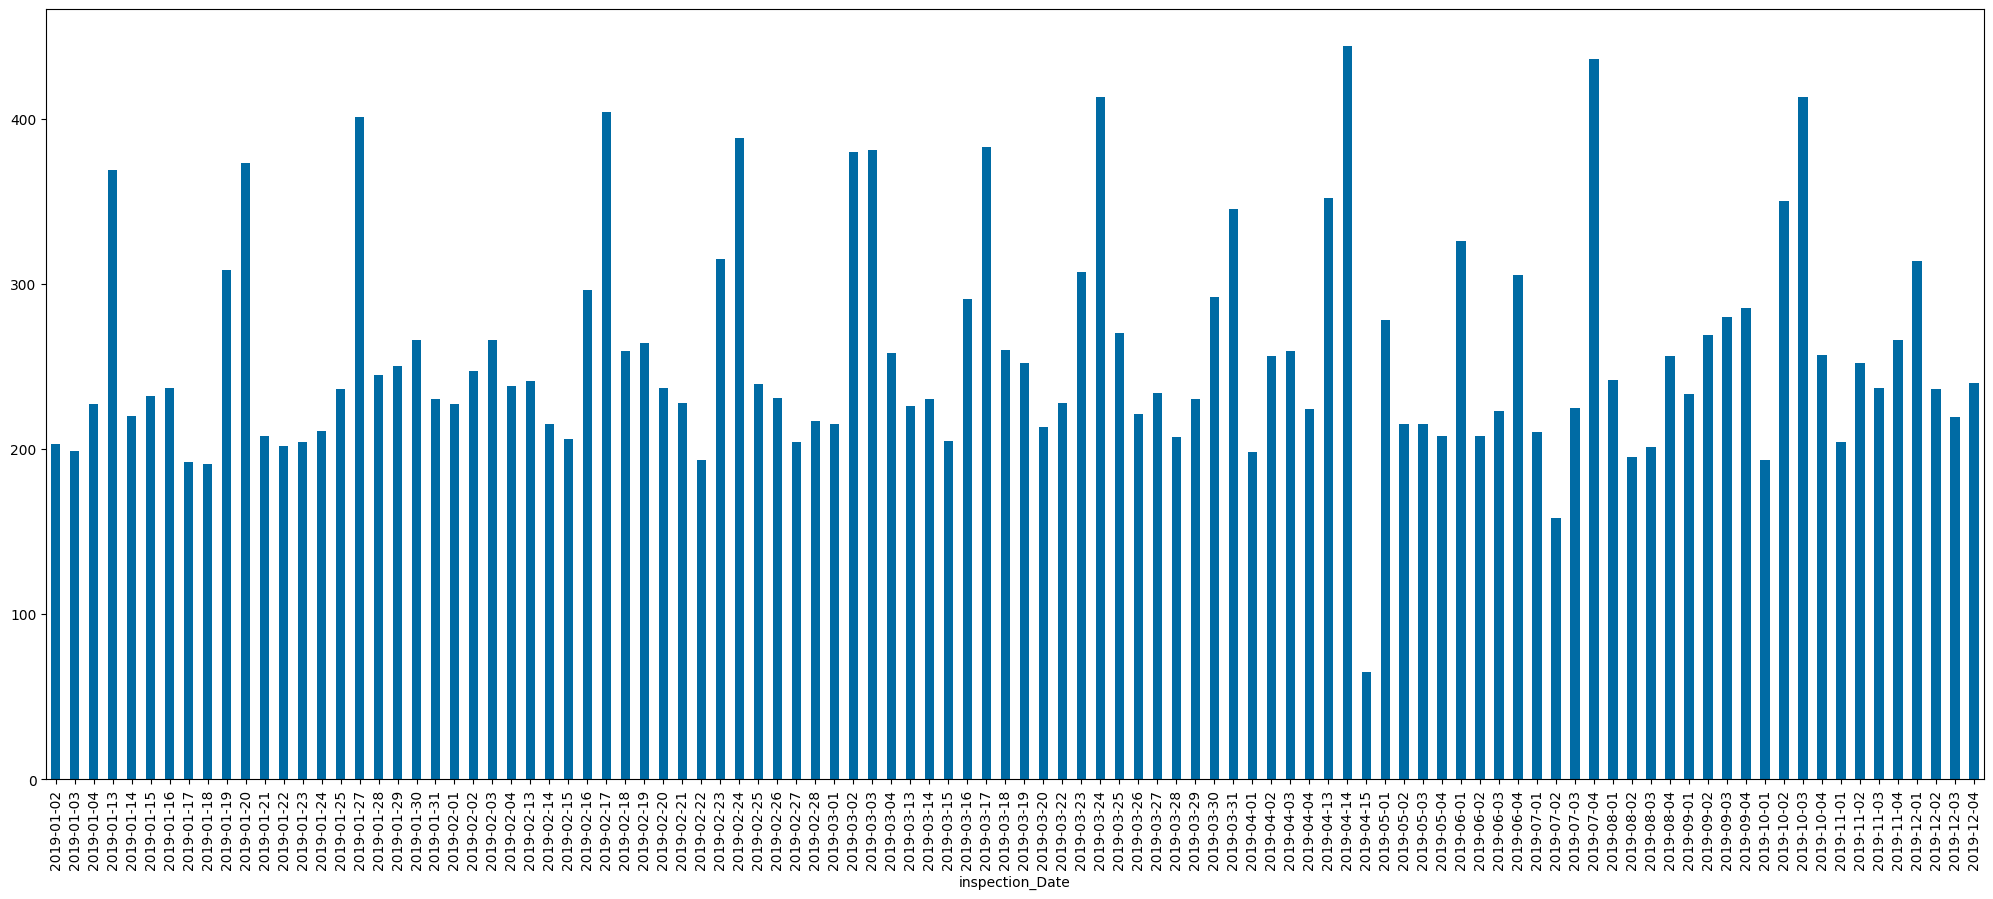

In [164]:
week_groups = (data.groupby('inspection_Date').count()['appointmentId'])
week_groups.plot(kind='bar',figsize=(25,10),legend=None)
plt.xlabel('inspection_Date')  # Add x-axis label
plt.show()

- weekly there are 250 to 300 inspection has been done

- Cacluating the daily average

In [165]:
# Cacluating the daily average
daily_avg = data.groupby('inspection_Date').count()['appointmentId'].mean()
print("Average daily inspections : {:.2f}".format(daily_avg))

Average daily inspections : 257.91


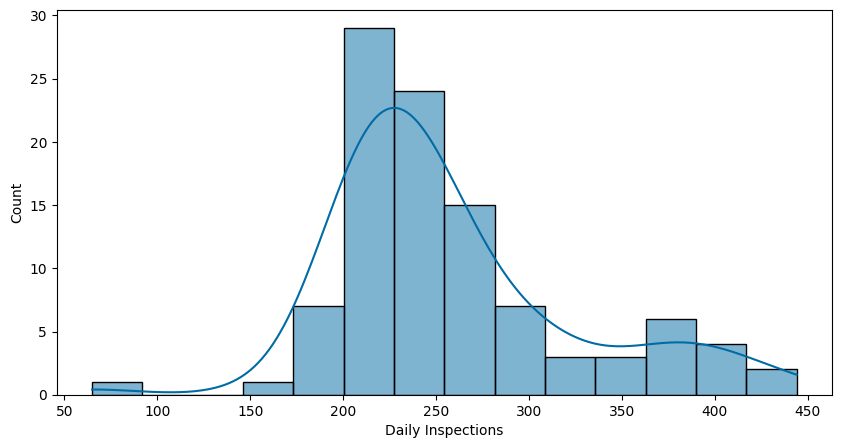

In [166]:
# Daily Inspections histogram
plt.figure(figsize=(10,5))
sns.histplot(data.groupby('inspection_Date').count()['appointmentId'], kde=True)
plt.xlabel("Daily Inspections")
plt.show()

### Cacluating the Monthly inspection

In [167]:
data['inspection_Month'].unique()

array([ 3,  1,  9,  4,  8,  5,  6,  2,  7, 10, 12, 11], dtype=int32)

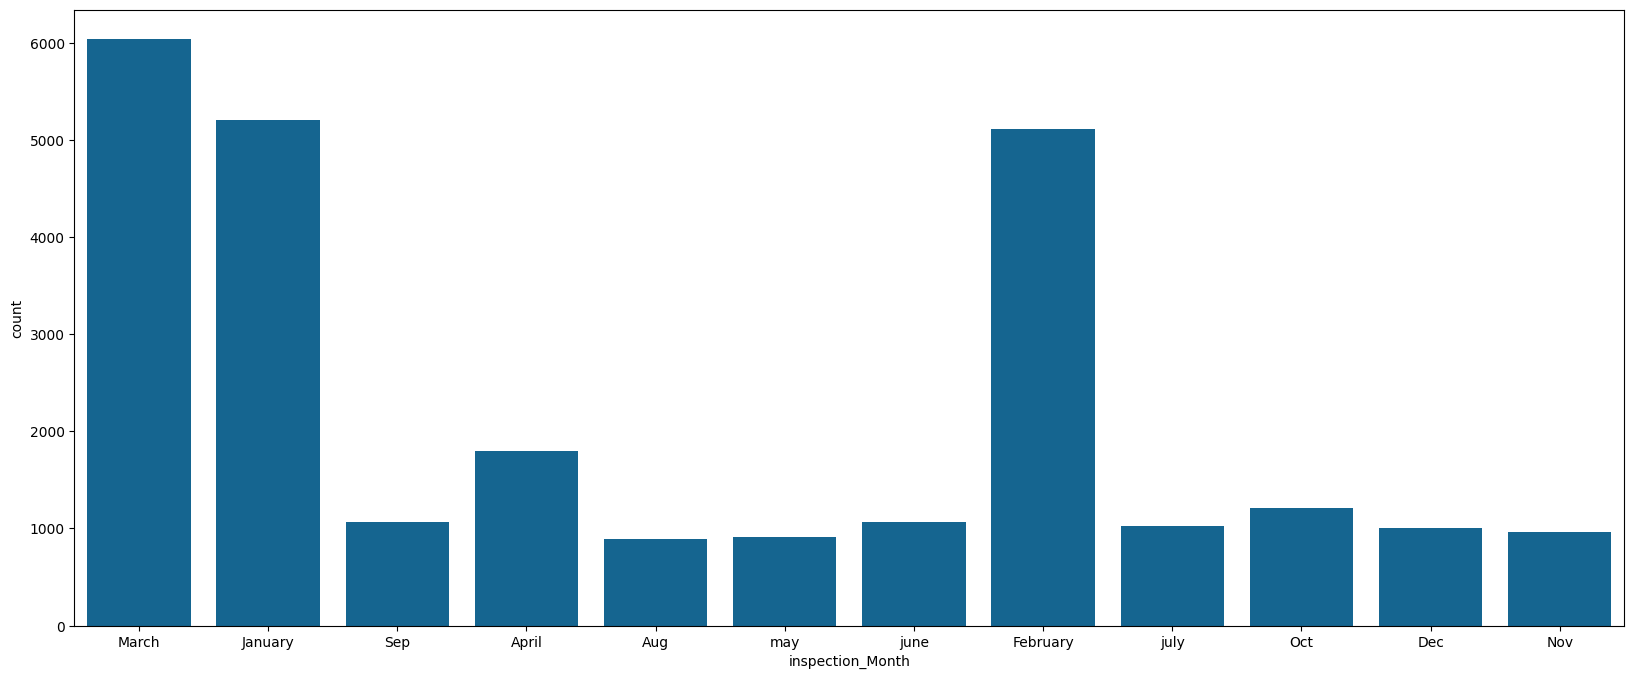

In [168]:
# Performing a similar analysis across month
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='inspection_Month', order=[3,  1,  9,  4,  8,  5,  6,  2,  7, 10, 12, 11])
plt.xticks(np.arange(0,12), labels = ["March", "January",'Sep', "April",'Aug','may','june',
                                      "February",'july','Oct',"Dec",'Nov'])

plt.show()

In [169]:
data.groupby("inspection_Month", sort=False).count()['appointmentId']

inspection_Month
3     6041
1     5204
9     1067
4     1798
8      894
5      916
6     1062
2     5115
7     1029
10    1213
12    1009
11     959
Name: appointmentId, dtype: int64

- Few high spikes of inspections can be seen on March, January, & February of the year.

### inspections across Day of Month

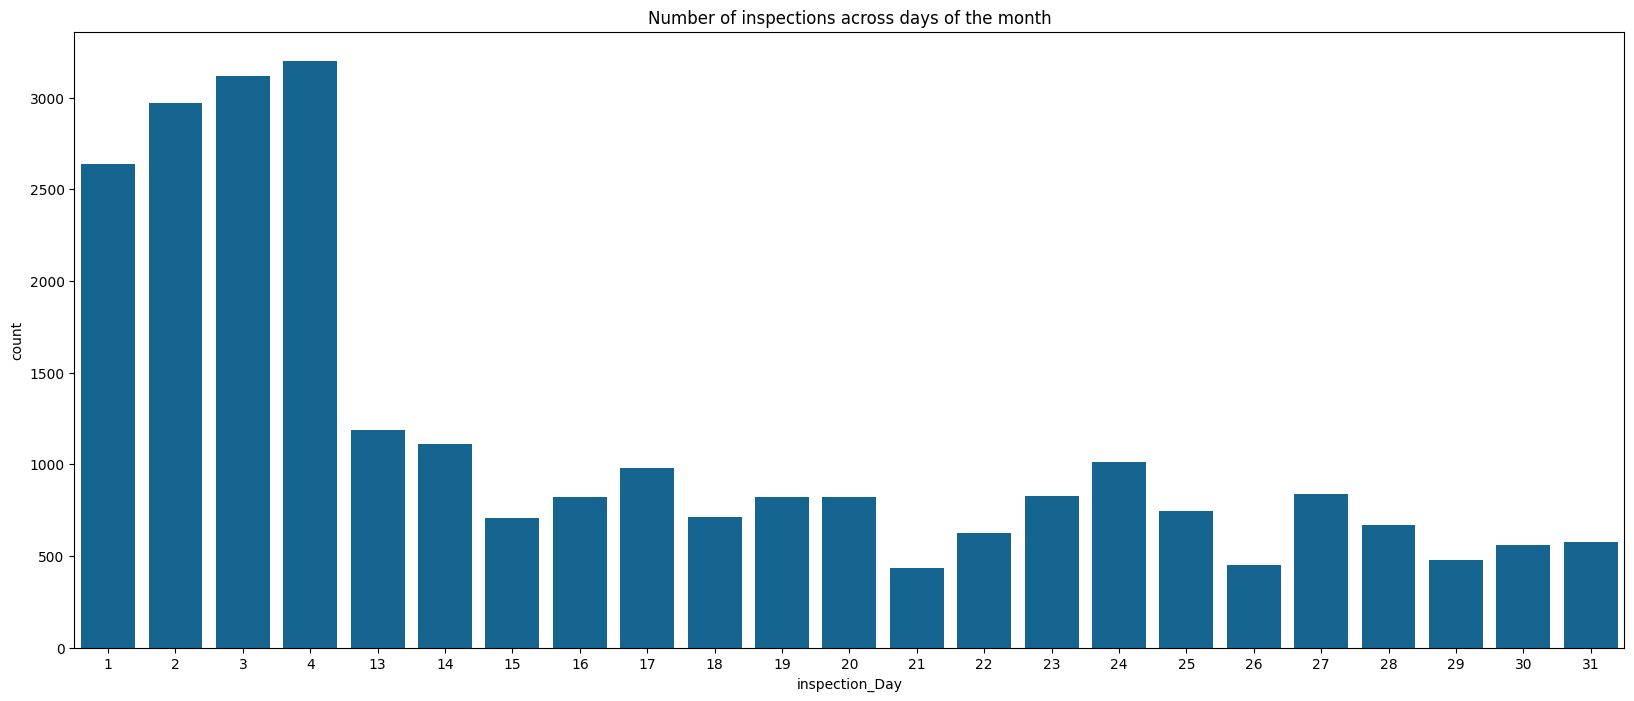

In [170]:
# Visualising number of inspections across Day of Month 
plt.figure(figsize=(20,8))
sns.countplot(data=data,x='inspection_Day')
plt.title("Number of inspections across days of the month")
plt.show()

- Few high spikes of inspections can be seen on 4rd, 3th, & 2th of the month.

### inspections across Week of year

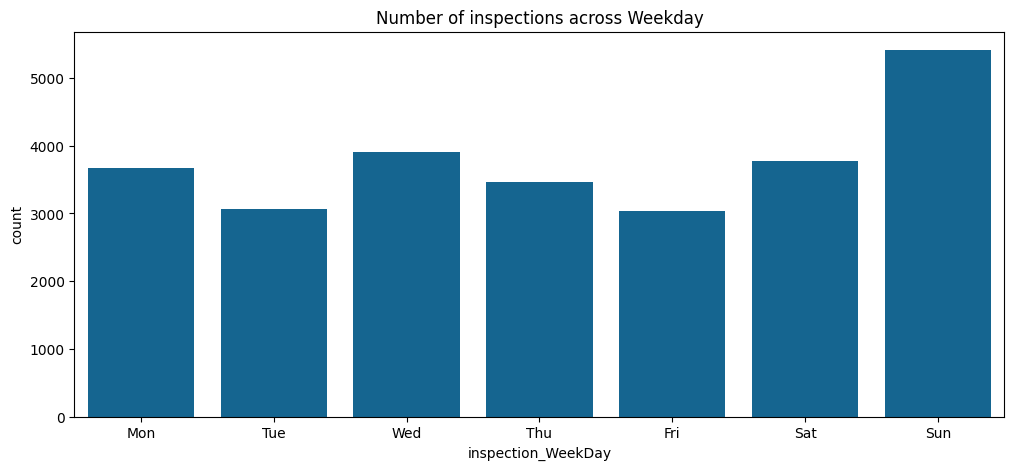

In [171]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='inspection_WeekDay')
plt.title("Number of inspections across Weekday")
plt.xticks(np.arange(0, 7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

In [172]:
data.groupby("inspection_WeekDay", sort=False).count()['appointmentId']

inspection_WeekDay
5    3775
2    3902
0    3664
4    3029
6    5415
3    3459
1    3063
Name: appointmentId, dtype: int64

In [173]:
# average weekly inspections
avg_weekly_inspections = data.groupby("inspection_WeekDay").count()['appointmentId'].mean()
Average_Weekend=len(data.groupby("inspection_WeekDay").get_group(5)) + len(data.groupby("inspection_WeekDay").get_group(6))
print("Average Weekly Inspections: {}".format(avg_weekly_inspections))
print("Average Weekend Inspections: {}".format(Average_Weekend/2))

Average Weekly Inspections: 3758.1428571428573
Average Weekend Inspections: 4595.0


- here we conclude that inspection is done on weekend more as compare to weekdays

### inspection Hour in a year

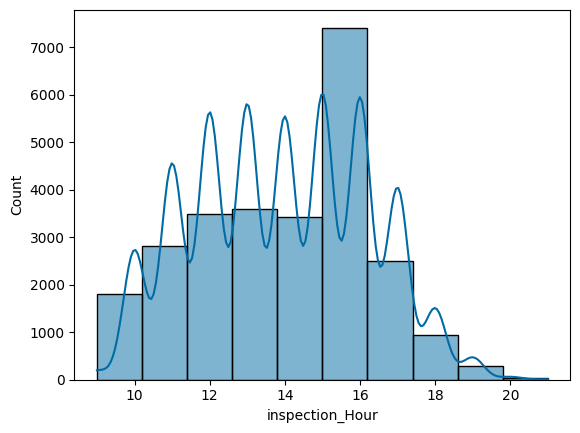

In [174]:
sns.histplot(data=data, x='inspection_Hour', kde=True, bins=10)
plt.show()

In [175]:
data['inspection_Hour'].value_counts() 

inspection_Hour
15    3727
16    3683
13    3594
12    3486
14    3427
11    2820
17    2505
10    1692
18     928
19     289
9      116
20      36
21       4
Name: count, dtype: int64

- As we can seen above most of inspection has been done between 12 AM to 4PM

### Analysis of registration year

<Axes: xlabel='year'>

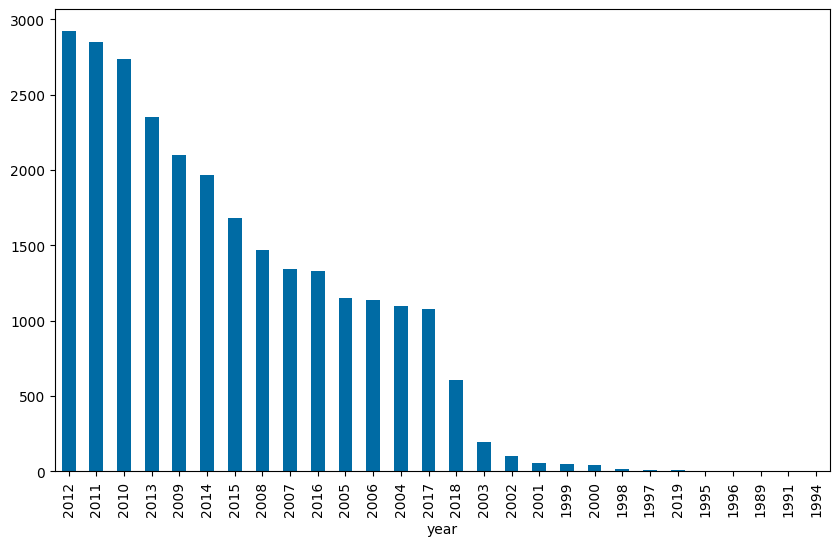

In [176]:
plt.subplots(figsize=(10,6))
data['year'].value_counts().plot(kind='bar')

In [177]:
# data['year'].value_counts()

print("Max Car Registration are in year 2012 : ",data['year'].value_counts().max())
print("Min Car Registration are in year 1989 : ",data['year'].value_counts().min())

Max Car Registration are in year 2012 :  2922
Min Car Registration are in year 1989 :  1


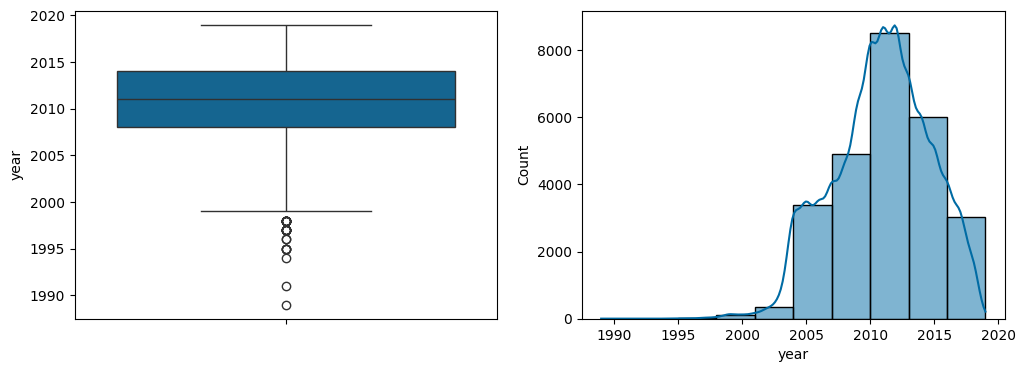

In [178]:
# year: registeration year
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['year'], ax=ax[0])
sns.histplot(data['year'], bins=10, kde=True, ax=ax[1])
plt.show()

- with help of box plot we can say there are some outlier in DB

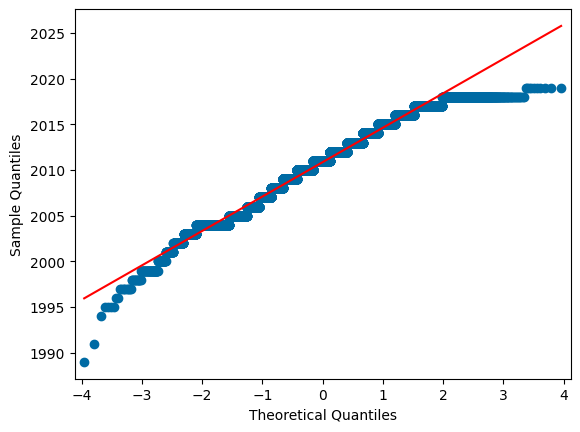

In [179]:
sm.qqplot(data['year'], line='s')
plt.show()

In [180]:
# Removing outlier using IQR (Inter Quartile Range)
def remove_outlier(data, year):
    q1 = np.quantile(data[year], .25)#the median of the lower half 
    q3 = np.quantile(data[year], .75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    
    return data[(data[year] < upper_limit) & (data[year] > lower_limit)]
   
data = remove_outlier(data, 'year')

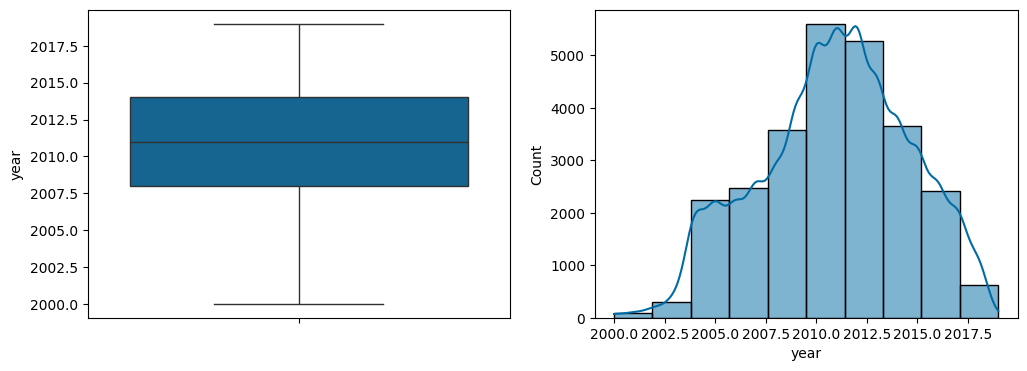

In [181]:
# after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['year'], ax=ax[0])
sns.histplot(data['year'], bins=10, kde=True, ax=ax[1])
plt.show()

- after removing outliers

In [182]:
#data['year'].value_counts()

In [183]:
print("Max Car Registration are in year 2012 : ",data['year'].value_counts().max())
print("Min Car Registration are in year 2019 : ",data['year'].value_counts().min())

Max Car Registration are in year 2012 :  2922
Min Car Registration are in year 2019 :  10


In [184]:
data.shape

(26226, 73)

### Analysis of registration month

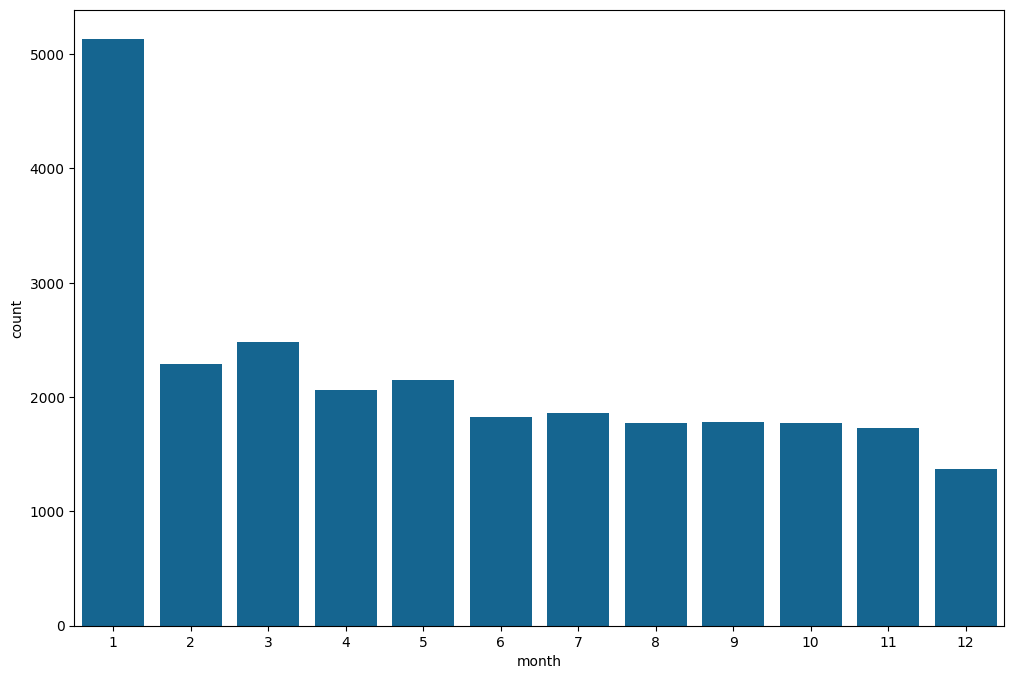

In [185]:
# month: registeration month
plt.figure(figsize=(12, 8))
sns.countplot(x = 'month', data=data)
plt.show()

In [186]:
#data['month'].value_counts()

In [187]:
print("Max Car Registration are in January : ",data['month'].value_counts().max())
print("Min Car Registration are in December : ",data['month'].value_counts().min())

Max Car Registration are in January :  5132
Min Car Registration are in December :  1371


### Analysis of categorical_data

- here we are considering appointmentId becouse it is unique

In [188]:
categorical_data = categorical_data.drop('appointmentId')

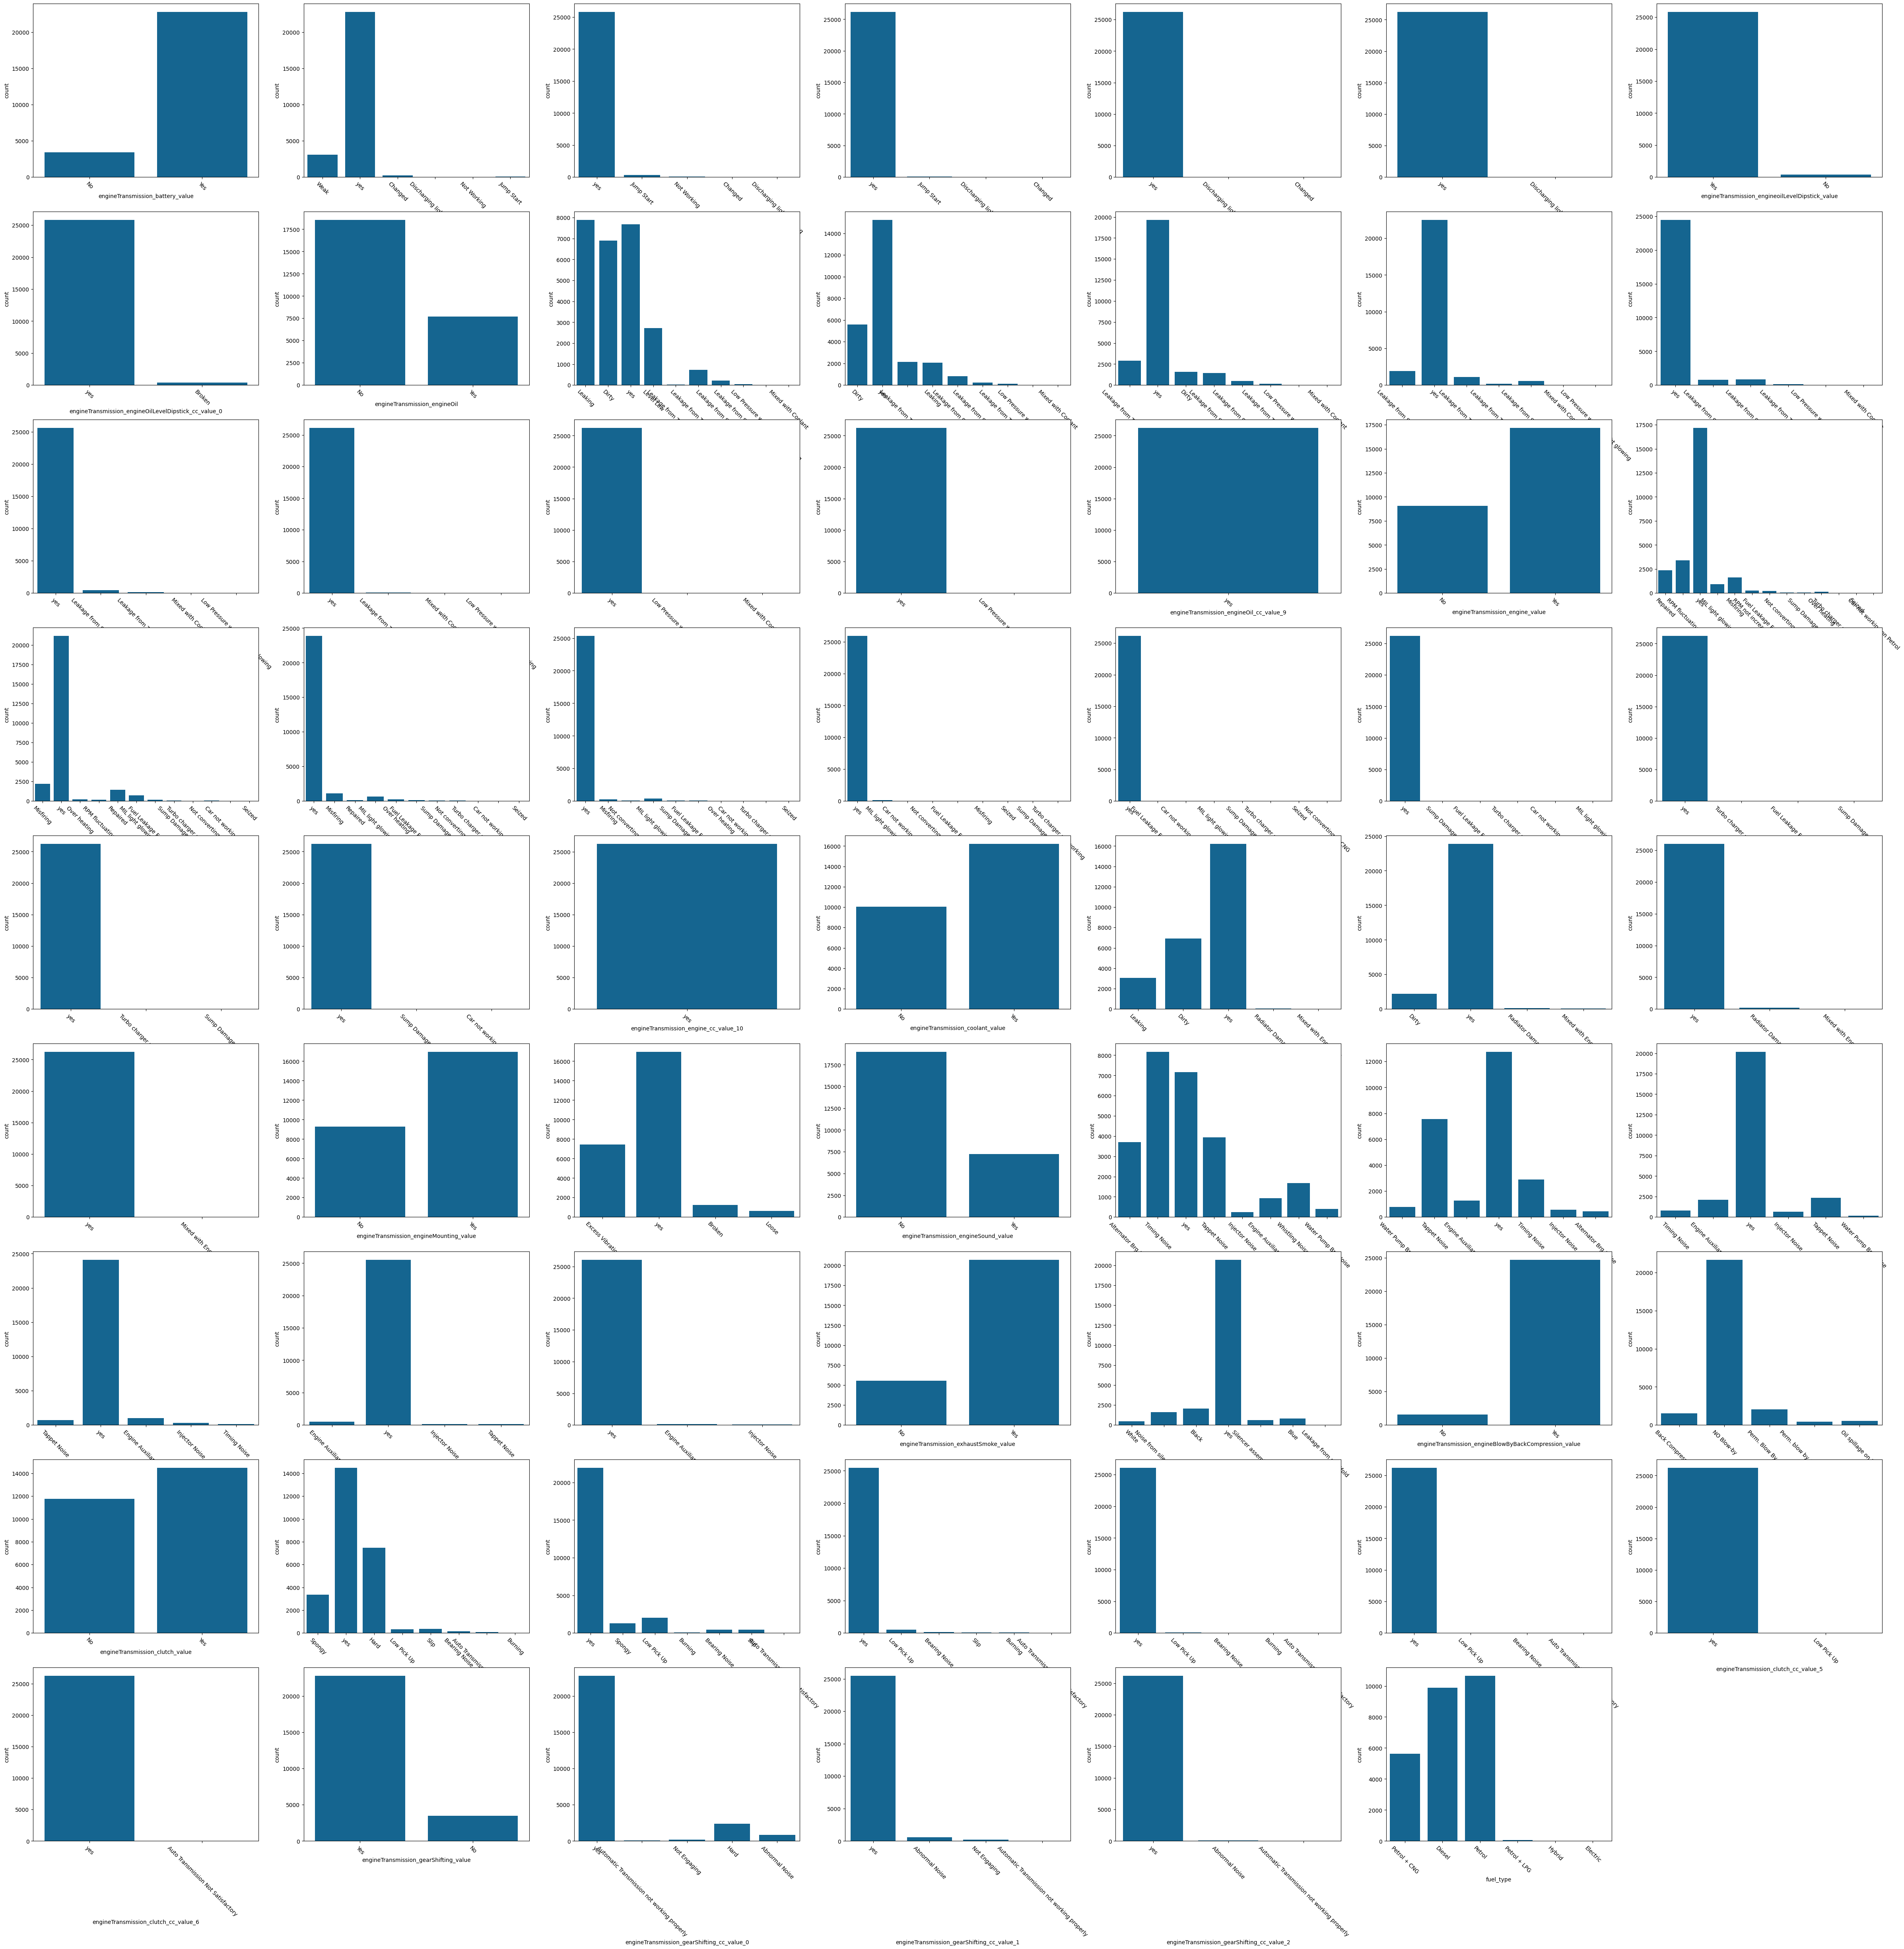

In [189]:
# Next we have a set of categorical columns, plotting the count distribution

fig = plt.figure(figsize=(60, 60))
for i, col in enumerate(categorical_data):
    plt.subplot(9, 7, i+1)
    sns.countplot(x = col, data = data)
    plt.xticks(rotation=-45)
plt.show()

- majority of Categorical data with high frequency

#### Analysis of Odometer data

In [190]:
data['odometer_reading'].value_counts()

odometer_reading
100000    8
46898     5
67537     4
51616     4
98958     4
         ..
180782    1
92372     1
78400     1
120102    1
23983     1
Name: count, Length: 23827, dtype: int64

In [191]:
# data['odometer_reading'].value_counts()

print("Max Car odometer_reading 100000  : ",data['odometer_reading'].value_counts().max())
print("Min Car odometer_reading : ",data['odometer_reading'].value_counts().min())

Max Car odometer_reading 100000  :  8
Min Car odometer_reading :  1


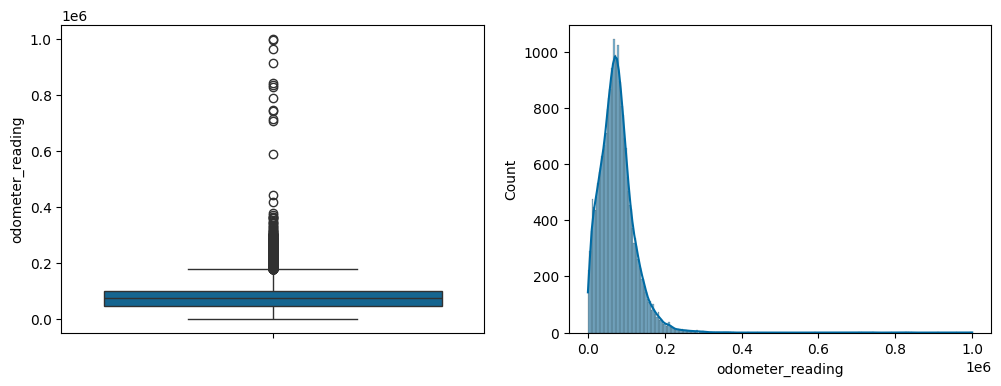

In [192]:
# odometer_reading
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['odometer_reading'], ax=ax[0])
sns.histplot(data['odometer_reading'], kde=True, ax=ax[1])
plt.show()

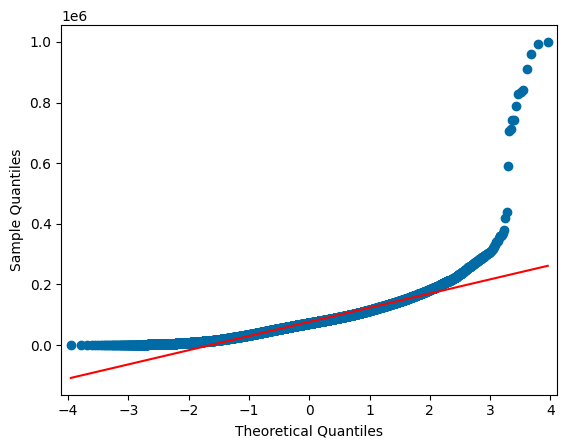

In [193]:
sm.qqplot(data['odometer_reading'], line='s')
plt.show()

- odometer is right skewed

- Odometer observation with a lot of outliers.

In [194]:
# Removing outliers usng IQR (Inter Quartile Range)
data = remove_outlier(data, 'odometer_reading')

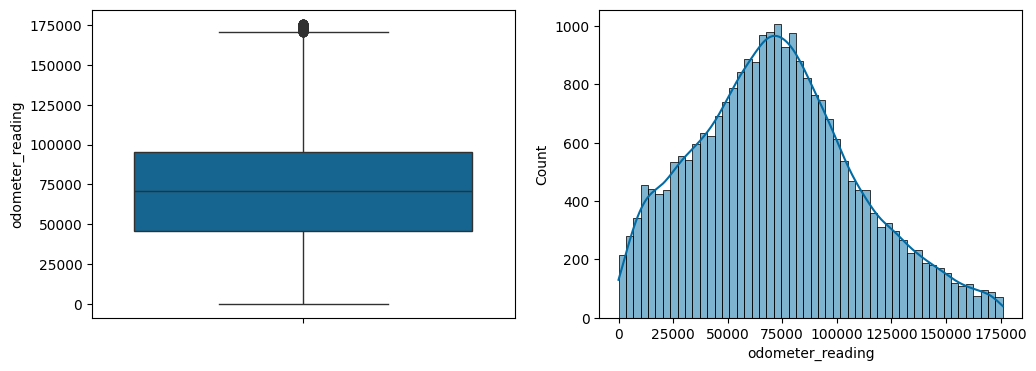

In [195]:
# odometer_reading
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data['odometer_reading'], ax=ax[0])
sns.histplot(data['odometer_reading'], kde=True, ax=ax[1])
plt.show()

- final shape of data after removing odometer_reading outliers

In [196]:
data.shape

(25514, 73)

### Analysis of rating_engineTransmission (Target Variable)

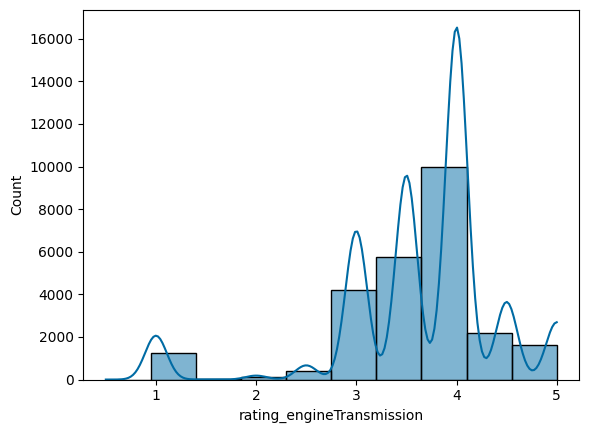

In [197]:
#  target variable i.e rating_engineTransmission
sns.histplot(data=data, x='rating_engineTransmission', bins=10, kde=True)
plt.show()

In [198]:
data['rating_engineTransmission'].value_counts()

rating_engineTransmission
4.0    9959
3.5    5775
3.0    4202
4.5    2195
5.0    1621
1.0    1241
2.5     402
2.0     112
1.5       6
0.5       1
Name: count, dtype: int64

- rating ranges from 0.5 to 5.0 (having 10 values)

- rating_engineTransmission 0.5, 1.5 & 2.0 have a very less count. (less than 1 %)

### Bivariate Analysis

In [199]:
data.head()

appointmentId inspectionStartTime inspection_Date  inspection_Month  \
0         aj_01 2019-03-02 15:43:00      2019-03-02                 3   
1         aj_02 2019-01-16 13:02:00      2019-01-16                 1   
2         aj_03 2019-09-02 13:31:00      2019-09-02                 9   
3         aj_04 2019-01-18 11:02:00      2019-01-18                 1   
4         aj_05 2019-01-27 12:12:00      2019-01-27                 1   

   inspection_Day  inspection_WeekDay  inspection_Hour  year  month  \
0               2                   5               15  2008      8   
1              16                   2               13  2007      5   
2               2                   0               13  2012      5   
3              18                   4               11  2013      1   
4              27                   6               12  2011      7   

  engineTransmission_battery_value  ... engineTransmission_clutch_cc_value_4  \
0                               No  ...                                  yes   
1                              Yes  ...                                  yes   
2                              Yes  ...                                  yes   
3                              Yes  ...                                  yes   
4                              Yes  ...                                  yes   

  engineTransmission_clutch_cc_value_5 engineTransmission_clutch_cc_value_6  \
0                                  yes                                  yes   
1                                  yes                                  yes   
2                                  yes                                  yes   
3                                  yes                                  yes   
4                                  yes                                  yes   

  engineTransmission_gearShifting_value  \
0                                   Yes   
1                                   Yes   
2                                   Yes   
3                                   Yes   
4                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_1  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_2     fuel_type odometer_reading  \
0                                        yes  Petrol + CNG           124600   
1                                        yes  Petrol + CNG            78108   
2                                        yes        Diesel            93348   
3                                        yes  Petrol + CNG            48233   
4                                        yes  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5 rows x 73 columns]

In [200]:
# Dropping appointmentId, inspectionStartTime & inspectionDate variables
data.drop(['appointmentId', 'inspectionStartTime', 'inspection_Date', 'inspection_Day', 'inspection_WeekDay'], axis=1, inplace=True)


In [201]:
data.head()

inspection_Month  inspection_Hour  year  month  \
0                 3               15  2008      8   
1                 1               13  2007      5   
2                 9               13  2012      5   
3                 1               11  2013      1   
4                 1               12  2011      7   

  engineTransmission_battery_value engineTransmission_battery_cc_value_0  \
0                               No                                  Weak   
1                              Yes                                   yes   
2                              Yes                                   yes   
3                              Yes                                   yes   
4                              Yes                                   yes   

  engineTransmission_battery_cc_value_1 engineTransmission_battery_cc_value_2  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

  engineTransmission_battery_cc_value_3 engineTransmission_battery_cc_value_4  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

   ... engineTransmission_clutch_cc_value_4  \
0  ...                                  yes   
1  ...                                  yes   
2  ...                                  yes   
3  ...                                  yes   
4  ...                                  yes   

  engineTransmission_clutch_cc_value_5 engineTransmission_clutch_cc_value_6  \
0                                  yes                                  yes   
1                                  yes                                  yes   
2                                  yes                                  yes   
3                                  yes                                  yes   
4                                  yes                                  yes   

  engineTransmission_gearShifting_value  \
0                                   Yes   
1                                   Yes   
2                                   Yes   
3                                   Yes   
4                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_1  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_2     fuel_type odometer_reading  \
0                                        yes  Petrol + CNG           124600   
1                                        yes  Petrol + CNG            78108   
2                                        yes        Diesel            93348   
3                                        yes  Petrol + CNG            48233   
4                                        yes  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5

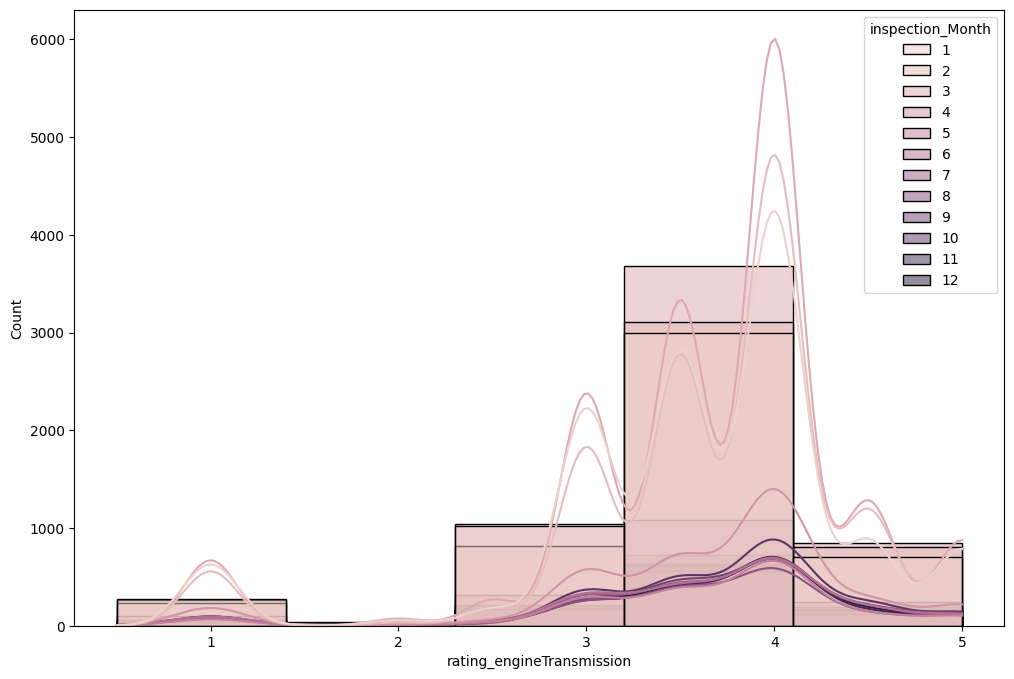

In [202]:
# Inspection month v/s rating_engineTransmission 
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='rating_engineTransmission', bins=5, hue='inspection_Month', kde=True)
plt.show()

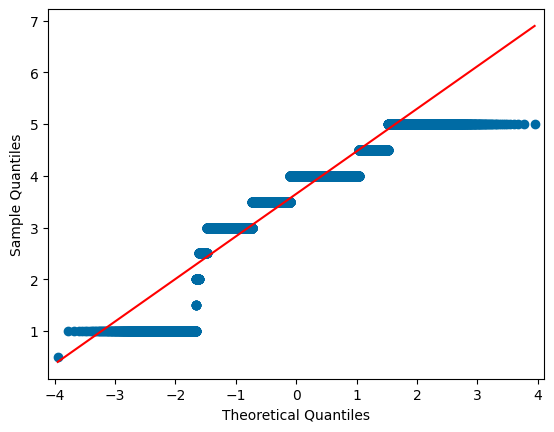

In [203]:
# relationship between INspection Month & Rating Engine transmission

sm.qqplot(data['rating_engineTransmission'], line='s')
plt.show()

- there is a dependence of inspectionMonth on rating_engineTransmission.

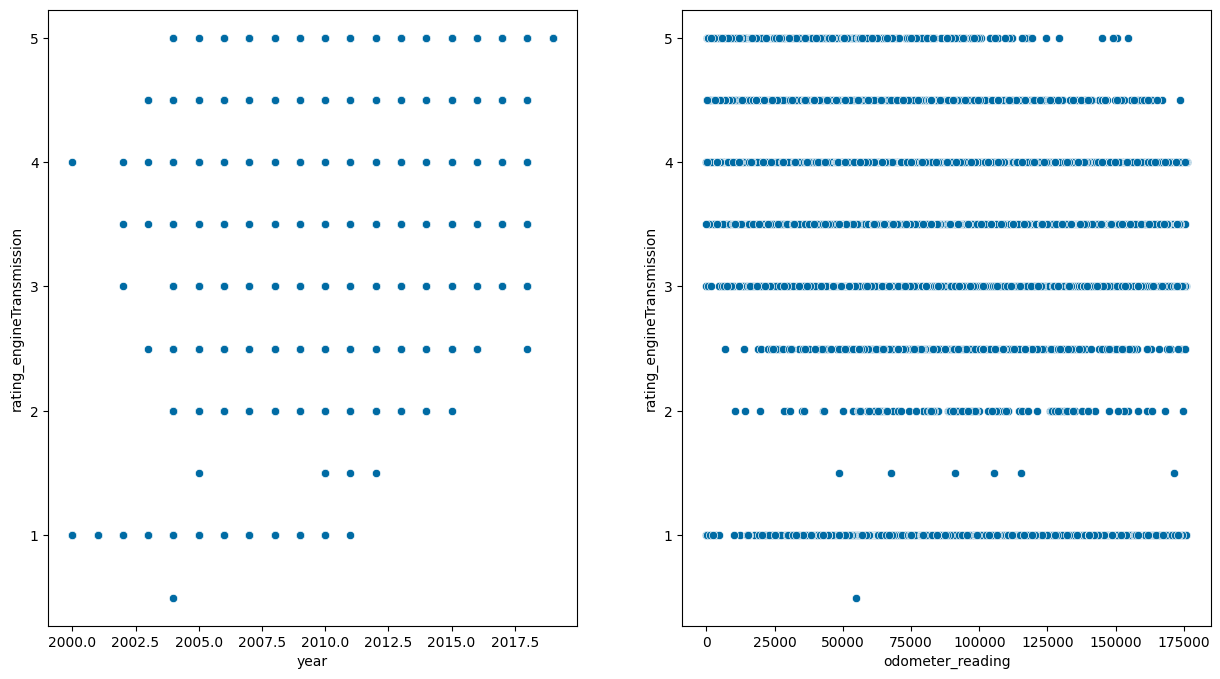

In [204]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(data=data, x='year', y='rating_engineTransmission', ax=ax[0])
sns.scatterplot(data=data, x='odometer_reading', y='rating_engineTransmission', ax=ax[1])
plt.show()

- The rating_engineTransmission appears to be more of a discrete variable.

###  Correlation Matrix

- evaluate relationship between features among the dataset

In [205]:
data.head()

inspection_Month  inspection_Hour  year  month  \
0                 3               15  2008      8   
1                 1               13  2007      5   
2                 9               13  2012      5   
3                 1               11  2013      1   
4                 1               12  2011      7   

  engineTransmission_battery_value engineTransmission_battery_cc_value_0  \
0                               No                                  Weak   
1                              Yes                                   yes   
2                              Yes                                   yes   
3                              Yes                                   yes   
4                              Yes                                   yes   

  engineTransmission_battery_cc_value_1 engineTransmission_battery_cc_value_2  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

  engineTransmission_battery_cc_value_3 engineTransmission_battery_cc_value_4  \
0                                   yes                                   yes   
1                                   yes                                   yes   
2                                   yes                                   yes   
3                                   yes                                   yes   
4                                   yes                                   yes   

   ... engineTransmission_clutch_cc_value_4  \
0  ...                                  yes   
1  ...                                  yes   
2  ...                                  yes   
3  ...                                  yes   
4  ...                                  yes   

  engineTransmission_clutch_cc_value_5 engineTransmission_clutch_cc_value_6  \
0                                  yes                                  yes   
1                                  yes                                  yes   
2                                  yes                                  yes   
3                                  yes                                  yes   
4                                  yes                                  yes   

  engineTransmission_gearShifting_value  \
0                                   Yes   
1                                   Yes   
2                                   Yes   
3                                   Yes   
4                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_1  \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

  engineTransmission_gearShifting_cc_value_2     fuel_type odometer_reading  \
0                                        yes  Petrol + CNG           124600   
1                                        yes  Petrol + CNG            78108   
2                                        yes        Diesel            93348   
3                                        yes  Petrol + CNG            48233   
4                                        yes  Petrol + CNG            74368   

  rating_engineTransmission  
0                       3.0  
1                       4.0  
2                       3.5  
3                       3.5  
4                       4.0  

[5

In [206]:
a = data.corr(numeric_only = True)
a

inspection_Month  inspection_Hour      year  \
inspection_Month                   1.000000         0.006159  0.007174   
inspection_Hour                    0.006159         1.000000 -0.044030   
year                               0.007174        -0.044030  1.000000   
month                              0.001266        -0.003938 -0.002768   
odometer_reading                   0.011909         0.012216 -0.458206   
rating_engineTransmission          0.008284        -0.034479  0.571842   

                              month  odometer_reading  \
inspection_Month           0.001266          0.011909   
inspection_Hour           -0.003938          0.012216   
year                      -0.002768         -0.458206   
month                      1.000000         -0.021419   
odometer_reading          -0.021419          1.000000   
rating_engineTransmission  0.108661         -0.388122   

                           rating_engineTransmission  
inspection_Month                            0.008284  
inspection_Hour                            -0.034479  
year                                        0.571842  
month                                       0.108661  
odometer_reading                           -0.388122  
rating_engineTransmission                   1.000000

In [207]:
!pip install matplotlib --upgrade

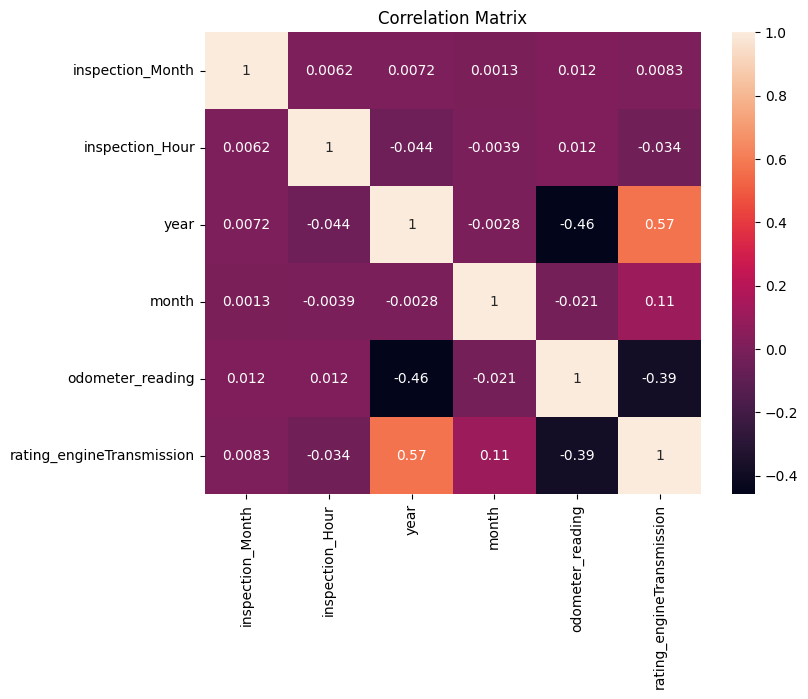

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(a, annot=a.to_numpy(), cbar= True)
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

### Data splitting

In [209]:
# 1. Split into training set & target
train = data.drop('rating_engineTransmission', axis=1).reset_index().drop('index', axis=1)
target = data['rating_engineTransmission'].reset_index().drop('index', axis=1)

# 2. Encode the categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# 3. Scale the data
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_encoded), columns=train_encoded.columns)
y = target

### Split the data into train & test

In [210]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80:20 split

# Model Training & Testing 

## 1. LinearRegression

In [211]:
# LinearRegression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

model = LR.fit(X_train,y_train)
pred_LR=LR.predict(X_test)

LR_train_score = LR.score(X_train, y_train)
LR_val_score = LR.score(X_test, y_test)
print(LR_train_score, LR_val_score)

0.4250287312357657 -5.04166300453069e+20


In [212]:
print("b0: ", LR.intercept_)
print("b1,b2: ", LR.coef_)

b0:  [-1.29812721e+12]
b1,b2:  [[ 1.40971325e-02 -5.05005859e-02  2.36831681e+00  2.65400980e-01
  -4.42752702e-01  1.55418971e+12 -6.01168934e-01 -4.14802626e-01
  -1.16524783e+00 -2.22198486e-01 -1.55418971e+12 -4.83657837e-01
  -2.88485527e-01 -5.84703445e-01 -9.65108871e-02  5.40217400e-01
   3.71132135e-01  6.83536530e-02 -4.42306519e-01  4.75638390e-01
   2.11124420e-02  1.66569522e+10 -1.66569522e+10  2.12489068e+11
   9.49096680e-03 -1.57814026e-02  1.31599426e-01  1.28661156e-01
   1.21582031e-01  5.79528809e-02  1.91124916e-01 -5.42668343e-01
  -2.12489068e+11  3.95507812e-02 -1.96990967e-02  6.93664551e-02
  -1.03759766e-02 -8.52050781e-02  8.93402100e-03 -6.04248047e-02
   5.22460938e-02 -7.54699707e-02 -1.16638184e-01 -5.90705872e-03
  -4.01000977e-02 -1.55977249e-01  1.66093826e-01 -8.52050781e-02
  -5.49163818e-02  1.24443054e-01 -3.56597900e-02 -7.15236664e-02
  -3.60696793e-01 -4.40979004e-03 -2.72750854e-02 -1.56700134e-01
   6.75010681e-03 -1.91612244e-02  1.47552490

In [213]:
print("Test R2 score is = ",LR.score(X_train,y_train))
LR_r2_score = r2_score(y_test,pred_LR)
print("Train R2 Score is = ",r2_score(y_test,pred_LR))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_LR))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_LR))

Test R2 score is =  0.4250287312357657
Train R2 Score is =  -5.04166300453069e+20
Train Mean Squared Error =  3.302242338423673e+20
Train Mean absolute Squared Error =  254385110.1339979


- R2 Score is very low in LinearRegression we need to try other algorithms

## 2. KNN Model

In [214]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
# Print the R squared scores
knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_test, y_test)
print(knn_train_score, knn_val_score)

0.7339094331767849 0.6166457361512114


In [215]:
print("Training R-Squared Score is = ",knn.score(X_train,y_train))
knn_r2_score = r2_score(y_test,pred_knn)
print("Testing R-Sqaured Score is = ",r2_score(y_test,pred_knn))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_knn))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_knn))

Training R-Squared Score is =  0.7339094331767849
Testing R-Sqaured Score is =  0.6166457361512114
Train Mean Squared Error =  0.25109347442680774
Train Mean absolute Squared Error =  0.35408583186360965


## 3. Decision Tree

In [216]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred_dt=dt.predict(X_test)
# Print the R squared scores
dt_train_score = dt.score(X_train, y_train)
dt_val_score = dt.score(X_test, y_test)
print(dt_train_score, dt_val_score)

1.0 0.3914584278301172


In [217]:
print("Training R-Squared Score is = ",dt.score(X_train,y_train))
dt_r2_score = r2_score(y_test,pred_dt)
print("Testing R-squared Score is = ",r2_score(y_test,pred_dt))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_dt))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_dt))

Training R-Squared Score is =  1.0
Testing R-squared Score is =  0.3914584278301172
Train Mean Squared Error =  0.3985890652557319
Train Mean absolute Squared Error =  0.422888496962571


## 4. Random Forest 

In [218]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)
# Print the R squared scores
rf_train_score = rf.score(X_train, y_train)
rf_val_score = rf.score(X_test, y_test)
print(rf_train_score, rf_val_score)

0.959343116474888 0.707159264172275


In [219]:
print("Train R2 Scre is = ",rf.score(X_train,y_train))
rf_r2_score = r2_score(y_test,pred_rf)
print("Test R2 Score is = ",r2_score(y_test,pred_rf))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_rf))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_rf))

Train R2 Scre is =  0.959343116474888
Test R2 Score is =  0.707159264172275
Train Mean Squared Error =  0.19180795610425241
Train Mean absolute Squared Error =  0.32601998824221046


## 5. ExtraTreesRegressor

In [220]:
# Extra Trees 
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train, y_train)
ext_pred = ext.predict(X_test)
# Print the R squared scores
ext_train_score = ext.score(X_train, y_train)
ext_val_score = ext.score(X_test, y_test)
print(ext_train_score, ext_val_score)
print(mean_squared_error(y_test,ext_pred))

1.0 0.7069865523551293
0.1919210807368215


## 6. XGboost - Gradient Boosting Algorithm 

In [221]:
# XGboost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)
# Print the R squared scores
xgb_train_score = xgb.score(X_train, y_train)
xgb_val_score = xgb.score(X_test, y_test)
print(xgb_train_score, xgb_val_score)

0.8203580285108101 0.7102713566735066


In [222]:
print("Accuracy of XGboost is = ",xgb.score(X_train,y_train))
xgb_r2_score = r2_score(y_test,pred_xgb)
print("Train R2 Score is = ",r2_score(y_test,pred_xgb))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_xgb))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_xgb))

Accuracy of XGboost is =  0.8203580285108101
Train R2 Score is =  0.7102713566735066
Train Mean Squared Error =  0.18976956448437968
Train Mean absolute Squared Error =  0.3282843981680626


## 7. LGBM Regressor - Gradient Boosting Algorithm

In [223]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

lgbm = LGBMRegressor(force_row_wise=True)
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring=make_scorer(r2_score))

# Print cross-validation scores
print("Cross-Validation R squared scores:", cv_scores)
print("Mean R squared score:", cv_scores.mean())

# Fit the model on the entire training set
lgbm.fit(X_train, y_train)

# Print the R squared scores on training and validation sets
lgbm_train_score = r2_score(y_train, lgbm.predict(X_train))
lgbm_val_score = r2_score(y_test, lgbm.predict(X_test))
print("Training R squared score:", lgbm_train_score)
print("Validation R squared score:", lgbm_val_score)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 16328, number of used features: 168
[LightGBM] [Info] Start training from score 3.655255


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 16329, number of used features: 169
[LightGBM] [Info] Start training from score 3.644957
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 16329, number of used features: 168
[LightGBM] [Info] Start training from score 3.648631
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 16329, number of used features: 170
[LightGBM] [Info] Start training from score 3.652520
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 16329, number of used features: 167
[LightGBM] [I

## 8. ANN - Multi Layer Perceptron Regressor

In [224]:
## ANN - MUlti Layer Perceptron 

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
#mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50, 30, 20, 10), max_iter=500, activation='relu', random_state=42)

mlp.fit(X_train, y_train)
mlp_pred=mlp.predict(X_test)
#Print the R squared scores
mlp_train_score = mlp.score(X_train, y_train)
mlp_val_score = mlp.score(X_test, y_test)
print(mlp_train_score, mlp_val_score)

0.8056324877487203 0.531712101101808


## 9. SVR - Support Vector Regressor

In [225]:
## SVR - Support vector Regressor 
from sklearn.preprocessing import StandardScaler
from  sklearn.svm import SVR
svr = SVR()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr.fit(X_train_scaled, y_train)
svr_pred=svr.predict(X_test_scaled)

#Print the R squared scores
svr_train_score = svr.score(X_train, y_train)
svr_val_score = svr.score(X_test, y_test)
print(svr_train_score, svr_val_score)

-0.03312899593200025 -0.044804747976285864


## Displaying the results

In [226]:
# Displaying the results
model_results_arr = {'Train Scores' : [LR_train_score,knn_train_score, dt_train_score, rf_train_score, ext_train_score, xgb_train_score, lgbm_train_score, mlp_train_score, svr_train_score], 
                     'Test Scores' : [LR_val_score,knn_val_score, dt_val_score, rf_val_score, ext_val_score, xgb_val_score, lgbm_val_score, mlp_val_score, svr_val_score],
                    }
results_df = pd.DataFrame(model_results_arr, index=['LinearRegression','KNN', 'DecisionTree', 'RandomForest','ExtraTree','XGBoost','LGBM', "ANN-MLP", "SupportVector"])
results_df

Train Scores   Test Scores
LinearRegression      0.425029 -5.041663e+20
KNN                   0.733909  6.166457e-01
DecisionTree          1.000000  3.914584e-01
RandomForest          0.959343  7.071593e-01
ExtraTree             1.000000  7.069866e-01
XGBoost               0.820358  7.102714e-01
LGBM                  0.766533  7.199465e-01
ANN-MLP               0.805632  5.317121e-01
SupportVector        -0.033129 -4.480475e-02

- here we can see that the R squared score of all models that we listed above are 
    1. LinearRegression, KNN, DecisionTree, RandomForest, ExtraTrees, MLPRegressor, SupportVectorRegressor models are giving results with overfitting.
    
    2. RandomForest, XGboost, LGBM models which are showing generalization. (Testing R2 Score > 0.7)

    - hence we will proceed with RandomForest, XGboost, LGBM for further finetuning.

# FineTuning

### Finetuning LGBM

In [227]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Initialize LGBMRegressor with some default parameters
lgbm = LGBMRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': np.arange(5, 15, 1),
}

# Use RandomizedSearchCV to find the optimal hyperparameters
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=50, scoring='r2', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters from the random search
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model from the random search
best_lgbm = random_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_lgbm, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R squared scores:", cv_scores)
print("Mean R squared score:", cv_scores.mean())

# Fit the best model on the entire training set
best_lgbm.fit(X_train, y_train)

# Print the R squared scores on training and validation sets
lgbm_train_score = r2_score(y_train, best_lgbm.predict(X_train))
lgbm_val_score = r2_score(y_test, best_lgbm.predict(X_test))
print("Training R squared score:", lgbm_train_score)
print("Validation R squared score:", lgbm_val_score)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 16328, number of used features: 168
[LightGBM] [Info] Start training from score 3.655255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 16329, number of used features: 169
[LightGBM] [Info] Start training from score 3.644957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### Finetuning XGBoost

In [228]:
# Finetuned using Grid Search 

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

xgb = XGBRegressor()

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [7],
    'min_child_weight': [5],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
}

scorer = make_scorer(r2_score)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scorer, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print the R-squared scores
best_model_train_score = best_model.score(X_train, y_train)
best_model_val_score = best_model.score(X_test, y_test)
print("Best Model Training R-squared:", best_model_train_score)
print("Best Model Validation R-squared:", best_model_val_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Model Training R-squared: 0.8312914728546122
Best Model Validation R-squared: 0.7237182684128904


In [229]:
# RandomSearchCV 

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score
import numpy as np

xgb = XGBRegressor()

param_dist = {
    'learning_rate':[0.060000000000000005],
    'n_estimators': [400],
    'max_depth': [7],
    'min_child_weight': [1],
    'subsample':[0.7999999999999999],
    'colsample_bytree': [0.6],
}

scorer = make_scorer(r2_score)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, scoring=scorer, cv=7, n_iter=20, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print the R-squared scores
best_model_train_score = best_model.score(X_train, y_train)
best_model_val_score = best_model.score(X_test, y_test)
print("Best Model Training R-squared:", best_model_train_score)
print("Best Model Validation R-squared:", best_model_val_score)


Fitting 7 folds for each of 1 candidates, totalling 7 fits
Best Hyperparameters: {'subsample': 0.7999999999999999, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.6}
Best Model Training R-squared: 0.8507528591287232
Best Model Validation R-squared: 0.7260110945221425


# Saving the final model 

In [230]:
# Storing the model in a pickle file
final_model = xgb
with open('final_model_XGboost', 'wb') as files:
    pickle.dump(final_model, files)

# Please answer the following:

#### 1. Briefly describe your approach to this problem and the steps you took

#### Ans:    My Approach
1. Import all the necessary libraries/packages 

2. Load the dataset into memory
3. EDA of data
      1. data.shape : concludes there are a total 26307 rows & 73 columns (including target variable) - 72 features
      2. data.info : gives data type of each feature.
            - here type of inspectionStartTime column is object and it is date type column so we need to change its data type to date and time
      3. data.describe - provides basic statistical inference of each column (max value, min value, mean, median, mode)
      4. Finding & visualising NaN values (sum & percentage of NaN values in each column)
            1. Total number of columns which has more than 40% null values in it: 52 
                  - (52 out of 72 independent varaibles have more then 40% null values)
                  
            2. Hypothesis : based on fields summary it seems that " NaN values need to be imputed as Yes in most columns "
                  - hypothesis testing - by Intersection check where,
                  - Set-A : column with their description as "current condition if not yes"
                  - set-B : col with more than 40% NaN values
                  - observation: set A intersection set B resulted in a Non-empty set, proving that the hypothesis of (NaN values should be imputed as yes) is True.
            3. intersection = 47 / 52 
                  - (47 out of 52 variables have a description of "current condition if not yes" -> these are imputed as yes)
            4. lets check other 5 columns that have null values but condtion is other then current "condition if not yes" 
                  - As we can analyze that these columns have more the 80% of null values and they are also not under condition of 40% more null values in it.
                  - We drop those colums as they are not important as for our analysis
                        
      5. Checking for categorical variables & continuous variables
            1. Total Categorcal data in DB :  63
            2. total continuous data in DB including target variable :  5

      6. Univariate Analysis
            1. inspectionStartTime: 
                  - The inspection data is from 2nd January 2019 to 15th April 2019.
                  - Extract the inspection month, day, dayofweek & hour
                  - Average daily inspections (for this sample): 257.9117647058824.
                  - We have inspection data for 102 dates.
                  - month-wise : monthly representation is maximum for March (~ 30%) followed by January (~ 27.4%), February(~ 27%) & April (~ 15.4%).
                  - day-wise : Few high spikes of inspections can be seen on 3rd, 10th, & 14th of the month.
                  - week-wise : Average Weekly Inspections: 3758.1428571428573
                              Average inspections on Weekends: 4963.0
                  - Clearly, there are more inspections on Weekends. (Average inspections on weekend is greather than weekly average inspeactions by 32%.)
                  - hour-wise: There's a spike in number of inspections across from 12 am to 4 pm.
            2. Year : registeration year
                  - registeration year data ranges from 1989 to 2019 (max registration year = 2019 and min registration year = 1989)
                  - create a monthly mappingOdometer has right skewed observation with a lot of outliers.
                  - outlier removal using IQR (Inter quartile range) technique
                  - max car were registered in January-> 5132 & min in December ->1371
                  - max car reg in 2012 -> 2922
                  - min car reg in 2019 -> 10
            3. odometer rating
                  - Odometer reading is range from 1 to 999999
                  - Odometer has right skewed observation with a lot of outliers.
                  - oulier removal using IQR method
                  - Max Car odometer_reading 100000  :  8
                  - Min Car odometer_reading :  1
            4. rating_engineTransmission (Target variable)
                  - rating ranges from 0.5 to 5.0 (having 10 values)
                  - rating_engineTransmission 0.5, 1.5 & 2.0 have a very less count. (less than 1 %)
                  - avg rating is 3.62

      7. Analysis of categorical data
            - majority of categorical data have very hgh frequency

      8. Bivariate Analysis (checking Relation b/w features)
            - there is a dependence of inspectionMonth on rating_engineTransmission.
            - Plot a correlation matrix
            - year (registration year) & odometer_reading has significant negative correlation with the rating_engineTransmission.

4. Data Preprocessing
      1) Split into training set & target
      2) encode the categorical variables (using get_dummies)
      3) scaling the data(using min max scaler)

5. Data Split (train & test split) -> 80:20

6. Model Training & Testing

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Train Scores</th>
      <th>Test Scores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>LinearRegression</th>
      <td>0.425029</td>
      <td>-5.041663e+20</td>
    </tr>
    <tr>
      <th>KNN</th>
      <td>0.733909</td>
      <td>6.166457e-01</td>
    </tr>
    <tr>
      <th>DecisionTree</th>
      <td>1.000000</td>
      <td>4.039494e-01</td>
    </tr>
    <tr>
      <th>RandomForest</th>
      <td>0.959380</td>
      <td>7.069791e-01</td>
    </tr>
    <tr>
      <th>ExtraTree</th>
      <td>1.000000</td>
      <td>7.053729e-01</td>
    </tr>
    <tr>
      <th>XGBoost</th>
      <td>0.820358</td>
      <td>7.102714e-01</td>
    </tr>
    <tr>
      <th>LGBM</th>
      <td>0.766533</td>
      <td>7.199465e-01</td>
    </tr>
    <tr>
      <th>ANN-MLP</th>
      <td>0.808071</td>
      <td>6.254377e-01</td>
    </tr>
    <tr>
      <th>SupportVector</th>
      <td>-0.033129</td>
      <td>-4.480475e-02</td>
    </tr>
  </tbody>
</table>
</div>
     
- here we can see that the R squared score of all models that we listed above are 
      1. LinearRegression, KNN, DecisionTree, RandomForest, ExtraTrees, MLPRegressor, SupportVectorRegressor models are giving results with overfitting.
      2. XGboost, LGBM models which are showing generalization. (Testing R2 Score > 0.71)
- hence we will proceed with XGboost, LGBM for further finetuning.
      
6. Finetuning:
      1. LGBM : using RandomSearchCV
            - Training R squared score: 0.7969750516972294
            - Validation R squared score: 0.7211616261543252

      2. XGBoost 
            1. Grid search 
                  1. Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
                  2. Best Model Training R-squared: 0.8312914728546122
                  3. Best Model Validation R-squared: 0.7237182684128904

            2. Random search
                  1. Best Hyperparameters: {'subsample': 0.79, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.06, 'colsample_bytree': 0.6}
                  2. Best Model Training R-squared: 0.8507528591287232
                  3. Best Model Validation R-squared: 0.7260110945221425
                  
      3. Final Model: we will go with XGBoost as our final model because it shows more generealization to new/unseen data and slightly better test R2 score

7. Storing the final model in a pickel file


2. Basics:
    1. How well does your model work?
    
    - Ans : I implemented 9 models in which Xgboot has given the best Training R2 Score (0.865429261592139) and Test R2 Score (0.720165539805564) as compared to other algorithm that i have used.
    

    2. How do you know for sure that’s how well it works?

    - Ans: I evaluated the model's performance using both Train R2 Score and Test R2 Score as evaluation metrics. In conclusion, these metrics provide insights into the model's ability to generalize from the training data to unseen test data."
            

    3. What stats did you use to prove its predictive performance and why?

    - Ans: It measures how well the model's predictions align with the actual values. The higher the R2 score, the better the model's ability to explain the variance in the target variable.
    

    4. What issues did you encounter?

    - Ans: issues:
        1) outliers : removed using IQR
        2) overfitting: removed using cross validation


    5. What insights did you obtain from this data? For example: What features are important? Why? What visualisations help you understand the data?

    - Ans : important features are:
        1. inspection Start Time
        2. Odometer reading
        3. year of registration


3. Next steps:

    1. What other data (if any) would have been useful?
    - Ans : Additional useful features
        - Displacement of vehicle
        - age of vehicle
        - brand reputation (good, bad)

    2. What are some other things you would have done if you had more time?
    - Ans : Additional experimentation
    
        - more detailed EDA:
            - i. look into more-rhobust feature selecton
    
        -  Model Training:
            - i. could have used multi-class classification (make 10 classes for engine_rating)
            - ii. pre-trained DL models can be implemented (i.e GPT)